**NOTEBOOKS**:



In [2]:
%run ../Project18-main/aux_notebook.py

In [3]:
#This should be run between models to load all the data. 
#That way, our backwards-feature selection has most features to build its data-set from.

#If this does not work. Make sure the folder is named "Project18-main"

%run ../Project18-main/AEEEM_DATA.py
%run ../Project18-main/NASA_DATA.py
%run ../Project18-main/PROMISE_DATA.py

### Table of Contents

* [Introduction](#intro)
    * [Research Question](#rq)  
    * [Data Exploration](#de) 
        * [AEEEM Data](#aeeem)
        * [NASA Data](#nasa)
        * [PROMISE Data](#promise)        
* [Supervised Classifiers](#sc)
    * [Random Forest](#rf)
    * [Naive Bayes](#nb)
    * [Logistic Regression](#lr)
* [Unsupervised Classifiers](#usc)
    * [K-means Clustering](#km)
    * [Spectral Clustering](#spectral)
* [Performance](#performance)
    * [AUC Scores](#table2)
    * [Confusion Matrices](#cmatrix)
* [Discussion](#discussion)
* [Scott Knot Test](#snt)
* [Tables and Results:](#results)
    * [Table 1](#table1)
    * [Table 1.1](#table1.2)
  
[Appendix](#appendix1)

## Introduction <a name="intro"></a>

The objective of this project is to reproduce the study by Zhang, Zheng, Zou, and Hassan in 2016: "Cross-project Defect Prediction Using a Connectivity-based Unsupervised Classifier". The paper aims to predict software defects using known data from 18 different projects extracted from three different datasets. The authors first apply known machine-learning algorithms such as k-means, naive Bayes, logistic regression, and random forest to test if any of these can deliver satisfactory performances. However, they all seem to have their respective problems. 

In software defect prediction, there is typically only a very limited amount of training data. This is a natural consequence of the heterogeneity that exists among software. As a result, supervised classifiers are not being fed an adequate amount of training data. K-means is a known and widely used algorithm for unsupervised learning, but it performs poorly in this setting. One of the main reasons, according to Zhang et al, is that the data is not linearly separable (other reasons are explained in the section on k-means clustering). 

The underperformance or general impracticability of these algorithms thus leaves a vacuum. Spectral Clustering rises to fill this vacuum and are superior due to e.g. less rigid assumptions on linear separability and the fact that it is unsupervised and thus does not need training data from homogeneous projects.

The authors do not explicitly perform feature-selection. Consequently, this is one of our optimizations. Specifically, we apply backward feature selection with good results. It decreases dimensionality thus improving interpretability, computation time, and decreasing noise. 

In the time of a global pandemic, it is evident that misclassifying a "Positive", as a "Negative", can be much worse than misclassifying a Negative as a Positive. Naturally, all of this depends on the context. In the case of software defects, it is vital to have a high sensitivity. That is, classifying defect software correctly. To monitor this, we have continuously applied confusion matrices to understand our models and to inform the user about the pros and cons of our models. We see this as an improvement to the original paper as they did not explain what drove the AUC scores.


## Research Question <a class="anchor" id="rq"></a>

### How does spectral clustering perform compared to usual supervised and unsupervised learning methods?


## Data Exploration <a class="anchor" id="de"></a>

Generally, it is important to explore the dataset to get an understanding of the features we can apply to our models. There are many explanations as to why one should go through the data and consider which features help classifies data and which features are simply noise:

1)
Firstly, it can be overwhelming to comprehend what the variables are telling us and human intuition is therefore benched from the very start. Decreasing dimensionality can therefore increase interpretability. 

2)
Secondly, and more theoretically founded, the enormous amount of predictors can lead to the curse of dimensionality. The curse of dimensionality, in its essence, is about the fact that as dimensions increase, clusters become more dissimilar. 

An intuitive example could be to investigate 100 people and only ask them about their weight to predict their sex. This would create two distinct clusters: Men and Women. However, imagine doing the same in multi-dimensional space. Asking about hair color, eye color, length of toes, height, weight, number of scars, etc. This would increase the dissimilarity within the clusters and therefore make it less certain how to predict a marginal person's gender.

3)
Thirdly, having many dimensions to optimize over increases computation time. 

4)
Lastly, it is vital to understand how imbalanced datasets interfere with machine learning algorithms' default parameters. 
For example, imagine that only 1% of observations are defective, implying that the algorithm can obtain a 99% accuracy by simply classifying everything as "not-defect". 
As a result, it is of interest to decide how a model is trained to improve Sensitivity ("Number of predicted defects"/"Total number of defects"), Specificity ("Number of predicted negatives" / "Total negatives"), or the AUC score which is the relationship between the two.


As a result, we will now proceed to decrease the number of features. We will discover how we do so for this dataset. 

### Feature Selection:

Now we will proceed by selecting our features. We follow these rules:

1) 
Intuition. Features that are not explained in Appendix 1 will be discarded. 

2) 
Backwards feature elimination. First fitting all features to a model and then, following a greedy technique, recursively removes the least important feature until the optimal set of features is found.

3) 
Applying oversampling. Oversampling is the exercise of increasing the number of the minority class to increase the balance of the data set. That is, to add randomly selected rows with defects. 
Under-sampling is the exact opposite. To remove a number of randomly selected rows with not-defects to increase sampling. This is, however, not a feasible option for us given the small size of our datasets.

### AEEEM Dataset  <a class="anchor" id="aeeem"></a>

In [7]:
#This code allow us to see the distribution of the largest project in the AEEEM Dataset

#histofdf(AEEEM_ML)

### NASA Dataset <a class="anchor" id="nasa"></a>

In [11]:
#This code allow us to see the distribution of data in the largest project in the AEEEM Dataset
#histofdf(NASA_PC4)

### PROMISE Dataset <a class="anchor" id="promise"></a>

In [12]:
#This code allow us to see the distribution of data the largest project in the AEEEM Dataset

#histofdf(PROMISE_Xalan_v_2_6)

## Supervised Classifiers <a class="anchor" id="sc"></a>

For the supervised classifiers, we need training data. To predict defects in a target project we fit a model on all the remaining projects and use the average AUC score for that specific supervised classifier. 

### Random forest <a class="anchor" id="rf"></a>

#### Short description

Random Forest is a supervised classifier that mitigates some of the difficulties with normal decision trees. Normal decision trees are said to have a higher variance as they are sensitive to training data cf. the algorithm's preference for pure nodes. Random Forest mitigates this by creating a “forest” of decision trees using boot-strapped datasets from the training data. The decided number of new trees is all built on random combinations of the original rows and columns. That is, bootstrapping is applied to decrease the sensitivity to training data and random-feature-selection is used to decrease correlation between our trees and thus decreases the variance of our ML algorithm. To consider test data, the algorithm uses aggregation for majority vote classification to predict, in this case, whether or not the software is a defect. 

#### Tuning parameters
Decreasing dimensionality can be important here to save computation time. We have attempted to fine-tune the model using backward feature selection.

N_estimators is the parameter that specifies the number of trees in the forest. That is, high numbers will create a bigger forest with more bootstrapping and decrease the chances of overfitting.

Max_Features is the parameter for the number of features in each tree in the forest. It is normal to apply the square root of the number of features ('auto' provides this number by default), but we also test using other constants the number of features.

N_depth depicts the number of layers in our tree. This can be used to shorten computation time at the cost of fit.

Class_weight is applied to balance the dataset since our dataset is heavily imbalanced as is evident from Table 1.

It has been found, that the best way to use Random Forest is by first implementing a greedy algorithm, backward feature elimination. A model we have developed ourselves. It is designed to drop the features that add the least value when predicting defects in the test project using Random Forest and training the model on a training set. 

To find these, we used set theory and found the intersection of the best-to-drop features from Logistic Regression and Naive Bayes. In that way, we felt comfortable not dropping important features while at the same time, decreasing dimensionality to improve computation time and decrease variance. 

For the cross-project AUC scores, it was generally a time-consuming task to tune since it takes a lot of time to compute when bootstrapping. For the within AUC scores, it was not feasible to run many combinations and we thus relied on the best parameters from the cross-project.

#### AEEEM

We chose this combination as AEEEM_JDT and AEEEM_EQ are the most balanced projects in the set. Following convention, we used the larger of the two datasets as training and the smaller as a test.
We have used grid-search to make sure that we do an extensive search for the optimal parameters. 
The rationing for training the backward feature selection model with the respective projects will also be applied in the following ML models. Henceforth, we will not repeat these considerations.


##### Cross-AUC = 0.59 with LN = False, Scale = False = Resampling = True, MinMax = False
##### Within-AUC = 0.67  with LN = False, Scale = False = Resampling = True, MinMax = False

#### NASA

We have applied the same feature selection approaches to this data set. NASA is, similar to AEEEM, imbalanced and we thus applied resampling techniques to mitigate this. We chose the training dataset for our greedy feature selection algorithm to be NASA_PC4 and test as NASA_PC3. The two projects are equally imbalanced and PC4 is marginally larger. 
The rationing for training the backward feature selection model with the respective projects will also be applied in the following ML models. Henceforth, we will not repeat these considerations.


##### Cross-AUC = 0.53 with LN = False, Scale = False = Resampling = True, MinMax = False
##### Within-AUC = 0.62 with LN = False, Scale = False = Resampling = True, MinMax = False

#### PROMISE

Applying similar techniques to the PROMISE dataset was intuitive as it had been beneficial in the other cases. However, the PROMISE dataset included object-oriented metrics, was made for JAVA, and not only did it have imbalanced projects but the imbalance varied greatly. Furthermore, the authors had access to slightly different versions of the projects and two more projects than us.
The rationing for training the backward feature selection model with the respective projects will also be applied in the following ML models. Henceforth, we will not repeat these considerations.

##### Cross-AUC = 0.60 with LN = False, Scale = False = Resampling = True, MinMax = False
##### Within-AUC = 0.72 with LN = False, Scale = False = Resampling = True, MinMax = False

We found that we were largely able to reproduce the cross-project AUC scores using Logistic Regression.

Unsuccessful applications:
* We also applied Recursive Feature Elimination to see if it could improve the fit, but it could not.
* We also applied log-transformation and scaling without benefits to the cross-AUC scores.
* We also applied a minmax algorithm to transform the data into a set range of 0,3. This was with the hope of not letting a single feature dominate by having a much larger variance. Ultimately, it did not improve our model.

In [13]:
#Backward Feature Selection for Random Forest for AEEEM
%run ../Project18-main/AEEEM_DATA.py

'''
fromLR = ['LDHH_numberOfPublicAttributes', 'LDHH_numberOfPublicMethods', 'ck_oo_dit', 'LDHH_lcom', 
            'LDHH_fanIn', 'numberOfNonTrivialBugsFoundUntil:', 'CvsWEntropy', 'ck_oo_numberOfPublicAttributes', 
            'LDHH_numberOfPrivateMethods', 'WCHU_noc', 'WCHU_wmc', 'WCHU_numberOfPublicMethods', 'WCHU_lcom', 
            'LDHH_noc', 'WCHU_numberOfPrivateAttributes', 'LDHH_numberOfLinesOfCode', 
            'LDHH_numberOfPrivateAttributes', 'LDHH_fanOut', 'ck_oo_numberOfPublicMethods', 
            'WCHU_numberOfLinesOfCode', 'LDHH_wmc', 'CvsExpEntropy', 'LDHH_dit', 'WCHU_fanIn', 
            'numberOfMajorBugsFoundUntil:', 'ck_oo_numberOfMethodsInherited', 'ck_oo_numberOfPrivateMethods', 
            'LDHH_numberOfAttributesInherited', 'numberOfBugsFoundUntil:', 'numberOfCriticalBugsFoundUntil:', 
            'LDHH_numberOfMethodsInherited', 'CvsEntropy', 'WCHU_numberOfMethods', 'WCHU_fanOut', 'WCHU_rfc', 
            'ck_oo_fanOut', 'ck_oo_noc', 'ck_oo_wmc', 'LDHH_cbo']

fromNB = ['ck_oo_numberOfPrivateAttributes', 'ck_oo_numberOfMethods', 'LDHH_lcom', 'LDHH_fanIn', 
             'CvsEntropy', 'ck_oo_numberOfPublicAttributes', 'LDHH_numberOfPublicMethods', 'WCHU_noc', 
             'LDHH_numberOfAttributesInherited', 'ck_oo_fanOut', 'LDHH_numberOfPrivateAttributes', 
             'LDHH_numberOfPublicAttributes', 'ck_oo_noc', 'LDHH_noc', 'WCHU_dit', 'LDHH_numberOfPrivateMethods', 
             'WCHU_numberOfAttributesInherited', 'LDHH_wmc', 'ck_oo_fanIn', 'numberOfNonTrivialBugsFoundUntil:', 
             'LDHH_numberOfAttributes', 'LDHH_numberOfLinesOfCode', 'LDHH_dit', 'CvsLinEntropy', 
             'WCHU_numberOfMethodsInherited', 'ck_oo_cbo', 'LDHH_fanOut', 'LDHH_numberOfMethodsInherited', 
             'LDHH_rfc', 'LDHH_cbo', 'WCHU_fanOut', 'ck_oo_wmc', 'WCHU_numberOfAttributes', 
             'numberOfBugsFoundUntil:', 'WCHU_lcom', 'ck_oo_rfc', 'CvsLogEntropy', 'WCHU_cbo', 
             'CvsExpEntropy', 'ck_oo_numberOfAttributes', 'WCHU_numberOfPrivateMethods', 
             'ck_oo_numberOfMethodsInherited', 'WCHU_numberOfMethods', 'ck_oo_lcom', 
             'WCHU_numberOfPublicMethods', 'numberOfMajorBugsFoundUntil:', 'ck_oo_dit', 
             'WCHU_numberOfPublicAttributes', 'WCHU_fanIn', 'numberOfHighPriorityBugsFoundUntil:', 
             'numberOfCriticalBugsFoundUntil:', 'WCHU_rfc', 'ck_oo_numberOfPublicMethods', 'WCHU_wmc']

drop_list = list(set(fromLR) & set(fromNB))
'''
drop_list = ['ck_oo_numberOfPublicAttributes', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_wmc', 
             'numberOfCriticalBugsFoundUntil:', 'WCHU_wmc', 'WCHU_noc', 'LDHH_lcom', 'LDHH_fanOut', 
             'ck_oo_dit', 'ck_oo_fanOut', 'numberOfMajorBugsFoundUntil:', 'LDHH_numberOfPrivateAttributes', 
             'LDHH_numberOfMethodsInherited', 'LDHH_numberOfPrivateMethods', 'LDHH_numberOfPublicMethods', 
             'LDHH_cbo', 'ck_oo_numberOfMethodsInherited', 'numberOfBugsFoundUntil:', 'LDHH_numberOfLinesOfCode', 
             'WCHU_fanIn', 'WCHU_lcom', 'WCHU_numberOfPublicMethods', 'WCHU_fanOut', 'LDHH_wmc', 'LDHH_dit', 
             'LDHH_fanIn', 'LDHH_numberOfPublicAttributes', 'WCHU_rfc', 'ck_oo_numberOfPublicMethods', 
             'CvsExpEntropy', 'ck_oo_noc', 'CvsEntropy', 'WCHU_numberOfMethods', 'LDHH_noc', 
             'LDHH_numberOfAttributesInherited']

for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)

In [14]:
#Backward Feature Selection for Random Forest for NASA
%run ../Project18-main/NASA_DATA.py

fromLR = ['LOC_BLANK', 'LOC_COMMENTS', 'NUM_OPERANDS', 'BRANCH_COUNT', 'HALSTEAD_ERROR_EST', 
            'HALSTEAD_LENGTH', 'HALSTEAD_EFFORT', 'HALSTEAD_PROG_TIME', 'HALSTEAD_CONTENT', 'HALSTEAD_VOLUME']

fromNB = ['LOC_BLANK', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY']

drop_list = list(set(fromLR) & set(fromNB))

for i in project_dict_NASA.values():
    drop_variables(i, drop_list)

In [15]:
#Backward Feature Selection for Random Forest for PROMISE
%run ../Project18-main/PROMISE_DATA.py

fromLR = ['wmc', 'ce', 'lcom', 'noc']

fromNB = ['cbm', 'ic', 'cbo', 'wmc', 'rfc', 'dam', 'npm', 'ce', 'noc', 'max_cc', 
            'cam', 'amc', 'mfa', 'loc', 'ca']

drop_list = list(set(fromLR) & set(fromNB))

for i in project_dict_PROMISE.values():
    drop_variables(i, drop_list)

In [16]:
ln = False
scale = False 
resampling = True
Squeeze_MinMax = False

def random_forest(df_train, df_test):
    
    '''
    Parameters
    ----------
    df_train : TYPE
        DESCRIPTION.
    df_test : TYPE
        DESCRIPTION.

    Returns
    -------
    y_pred : TYPE
        DESCRIPTION.
    y_test : TYPE
        DESCRIPTION.

    '''
    if resample:
        df_train = resample(df_train)
        
    if ln:
        df_train.iloc[:,:-1] = logX(df_train)
        df_test.iloc[:,:-1] =logX(df_test)     
    
    #Assign values 
    y_train = list(df_train['class'])
    y_test = list(df_test['class'])
    X_train = df_train.iloc[:,:-1]
    X_test = df_test.iloc[:,:-1]
            
    if scale:
        X_train, X_test = scale_data(df_train, df_test)

    if Squeeze_MinMax:
        X_train, X_test = minmax(df_train, df_test) 
        
        
    param_grid = { 
        'n_estimators': [50, 100],
        'max_features': ['auto', 5, 10],
        'max_depth' : [10,15,20],
        'criterion' : ['entropy'],
        'class_weight' : ['balanced']}

    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=7)

    model = RandomForestClassifier(random_state=7, n_jobs = -1)
    
    CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring = 'roc_auc')
    CV_rfc.fit(X_train, y_train)
    model_best = RandomForestClassifier(**CV_rfc.best_params_)
    model_best.fit(X_train, y_train)
    y_pred = model_best.predict(X_test)
    print(CV_rfc.best_params_)
 
    return y_pred, y_test

In [17]:
#get_auc_scores(project_dict_AEEEM, random_forest, average_AUC_cross)

#get_auc_scores(project_dict_NASA, random_forest, average_AUC_cross)

#get_auc_scores(project_dict_PROMISE, random_forest, average_AUC_cross)

In [18]:
#get_auc_scores(project_dict_AEEEM, random_forest, average_AUC_within)

#get_auc_scores(project_dict_NASA, random_forest, average_AUC_within)

#get_auc_scores(project_dict_PROMISE, random_forest, average_AUC_within)

### Naive Bayes <a class="anchor" id="nb"></a>

#### Short description

Naive Bayes is a supervised classifier that classifies entities based on probabilities. Probabilities are calculated “naively” by assuming all features are independent of one another. While this may often not reflect reality, it is computationally less demanding than complex models and Naive Bayes tends to perform well. As a result, the authors and many others use it for completeness and it provides a meaningful benchmark to the spectral clustering. Naive Bayes works by computing the conditional probability for each feature. That is, the probability of the feature being true given that the software is a defect. Naive Bayes is thus often computed over binary variables, but packages also allow for computing on continuous variables assuming a gaussian distribution or by categorizing the observations into discrete bins.



#### Tuning parameters

As with Random Forest, it has been found, that the best way to optimize the function is by implementing backward features selection. 
We have also applied log transformation of the data in almost all but one computation with good results. Since much of our data has non-gaussian distributions and more closely replicates a log-normal distribution, log-transforming the data has benefits for the machine learning algorithms. 

#### AEEEM

##### Cross-AUC = 0.66 with LN = True, Scale = False = Resampling = True, MinMax = True
##### Within-AUC = 0.68 with LN = False, Scale = False = Resampling = True, MinMax = True

#### NASA

##### Cross-AUC = 0.66 with LN = True, Scale = False = Resampling = True, MinMax = False
##### Within-AUC = 0.71 with LN = True, Scale = False = Resampling = True, MinMax = True

#### PROMISE

##### Cross-AUC = 0.58 with LN = True, Scale = False = Resampling = True, MinMax = True
##### Within-AUC = 0.59 with LN = True, Scale = False = Resampling = True, MinMax = True

We found that we were not able to completely reproduce the high AUC scores that the authors did. However, on individual project level, we did reproduce them, but have been negatively affected by smaller access to data and time constraints.

In [19]:
#Backward Feature Selection for Naive Bayes for AEEEM
%run ../Project18-main/AEEEM_DATA.py

#drop_list = backward_feature_selection(AEEEM_JDT, AEEEM_EQ, ComplementNB, scale = False, log = True)

drop_list = ['ck_oo_numberOfPrivateAttributes', 'ck_oo_numberOfMethods', 'LDHH_lcom', 'LDHH_fanIn', 
             'CvsEntropy', 'ck_oo_numberOfPublicAttributes', 'LDHH_numberOfPublicMethods', 'WCHU_noc', 
             'LDHH_numberOfAttributesInherited', 'ck_oo_fanOut', 'LDHH_numberOfPrivateAttributes', 
             'LDHH_numberOfPublicAttributes', 'ck_oo_noc', 'LDHH_noc', 'WCHU_dit', 'LDHH_numberOfPrivateMethods', 
             'WCHU_numberOfAttributesInherited', 'LDHH_wmc', 'ck_oo_fanIn', 'numberOfNonTrivialBugsFoundUntil:', 
             'LDHH_numberOfAttributes', 'LDHH_numberOfLinesOfCode', 'LDHH_dit', 'CvsLinEntropy', 
             'WCHU_numberOfMethodsInherited', 'ck_oo_cbo', 'LDHH_fanOut', 'LDHH_numberOfMethodsInherited', 
             'LDHH_rfc', 'LDHH_cbo', 'WCHU_fanOut', 'ck_oo_wmc', 'WCHU_numberOfAttributes', 
             'numberOfBugsFoundUntil:', 'WCHU_lcom', 'ck_oo_rfc', 'CvsLogEntropy', 'WCHU_cbo', 
             'CvsExpEntropy', 'ck_oo_numberOfAttributes', 'WCHU_numberOfPrivateMethods', 
             'ck_oo_numberOfMethodsInherited', 'WCHU_numberOfMethods', 'ck_oo_lcom', 
             'WCHU_numberOfPublicMethods', 'numberOfMajorBugsFoundUntil:', 'ck_oo_dit', 
             'WCHU_numberOfPublicAttributes', 'WCHU_fanIn', 'numberOfHighPriorityBugsFoundUntil:', 
             'numberOfCriticalBugsFoundUntil:', 'WCHU_rfc', 'ck_oo_numberOfPublicMethods', 'WCHU_wmc']

for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)

In [20]:
#Backward Feature Selection for Naive Bayes for NASA
%run ../Project18-main/NASA_DATA.py

#drop_list = backward_feature_selection(NASA_PC4, NASA_PC3, ComplementNB, scale = False, log = True)

drop_list = ['LOC_BLANK', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY']

for i in project_dict_NASA.values():
    drop_variables(i, drop_list)

In [21]:
#Backward Feature Selection for Naive Bayes for PROMISE
%run ../Project18-main/PROMISE_DATA.py

#drop_list = backward_feature_selection(PROMISE_Camel_v_1_6, PROMISE_Jedit_v_4_0, ComplementNB, scale = False, log = True)
drop_list = ['cbm', 'ic', 'cbo', 'wmc', 'rfc', 'dam', 'npm', 'ce', 'noc', 'max_cc', 
            'cam', 'amc', 'mfa', 'loc', 'ca']
for i in project_dict_PROMISE.values():
    drop_variables(i, drop_list)

In [22]:
ln = True
scale = False #Not possible with ComplementNB as it does not take negative values
resampling = True
Squeeze_MinMax = True

def naive_bayes(df_train, df_test):
    
    if resample:
        df_train = resample(df_train)
        
    if ln:
        df_train.iloc[:,:-1] = logX(df_train)
        df_test.iloc[:,:-1] =logX(df_test)    
    
    y_train = list(df_train['class'])
    y_test = list(df_test['class'])
    X_train = df_train.iloc[:,:-1]
    X_test = df_test.iloc[:,:-1]
    
    
    if scale:
        X_train, X_test = scale_data(df_train, df_test)

    if Squeeze_MinMax:
        X_train, X_test = minmax(df_train, df_test) 
             

    nb = ComplementNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    return y_pred, y_test

In [23]:
#get_auc_scores(project_dict_AEEEM, naive_bayes, average_AUC_cross)

#get_auc_scores(project_dict_NASA, naive_bayes, average_AUC_cross)

#get_auc_scores(project_dict_PROMISE, naive_bayes, average_AUC_cross)

In [24]:
#get_auc_scores(project_dict_AEEEM, naive_bayes, average_AUC_within)

#get_auc_scores(project_dict_NASA, naive_bayes, average_AUC_within)

#get_auc_scores(project_dict_PROMISE, naive_bayes, average_AUC_within)

### Logistic regression <a class="anchor" id="lr"></a>
#### Short description

Logistic Regression is a supervised classifier that uses probability to predict the label of an entity. Firstly, multiple linear regression is used to find the weight of each predictor variable. When the goal is to classify binary variables, as opposed to continuous variables, it makes little sense to talk about a linear effect of changing the predictor values. Rather, it makes sense to investigate how much the probability of software being defect changes when a predictor’s value changes. Ultimately, logistic regression provides an approach to classify or prioritize among variables based on their probability to be e.g. defect.


The sigmoid function tells us that the probability of defect software is increasing in $ \beta_0 + x_1 \cdot \beta_1 + x_2 \cdot \beta_2 + ... + x_n \cdot \beta_n $ and approaches 1 (that is, 100%) as $ \beta_0 + x_1 \cdot \beta_1 + x_2 \cdot \beta_2 + ... + x_n \cdot \beta_n $ goes up. A threshold is then passed to the logistic regression to decide at which probabilities the observation should be classified as true/false. This is a meaningful difference to linear regression which merely fits a line (or plane) through the data points to minimize the squared errors but does not help classify. 


///As with other supervised classifiers, the logistic regression is a serious contender for datasets with much training data. However, as the authors emphasize, software defect prediction is typically not based on large amounts of data. Rather on smaller individual projects with heterogeneous metrics that make it infeasible and suboptimal to train models to predict the defects. It is nonetheless interesting to compare the performance of the logistic regression to proxy what could be expected to be achieved, ceteris paribus, if data was fully available. Thereby assessing whether spectral clustering underperforms or not.


#### Tuning parameters
#### AEEEM

##### Cross-AUC = 0.67 with LN = False, Scale = True = Resampling = True, MinMax = False
##### Within-AUC = 0.7 with LN = False, Scale = True = Resampling = True, MinMax = False

#### NASA

#### Cross-AUC = 0.64 with LN = False, Scale = True = Resampling = True, MinMax = False
#### Within-AUC = 0.68 with LN = False, Scale = True = Resampling = True, MinMax = False

#### PROMISE

##### Cross-AUC = 0.63 with LN = False, Scale = True = Resampling = True, MinMax = False
##### Within-AUC = 0.67 with LN = True, Scale = True = Resampling = True, MinMax = False

We found that we were largely able to reproduce the cross-project AUC scores using Logistic Regression.


Unsuccessful applications:
* We also applied Recursive Feature Elimination to see if it could improve the fit, but it could not.
* We also applied log-transformation with benefits to the cross-AUC scores.
* We also applied a minmax algorithm to transform the data into a set range of 0,1. This was with the hope of not letting a single feature dominate by having a much larger variance. Ultimately, it did not improve our model.

In [25]:
#Backward Feature Selection for Logistic Regression for AEEEM
%run ../Project18-main/AEEEM_DATA.py

#drop_list = backward_feature_selection(AEEEM_JDT, AEEEM_EQ, LogisticRegression, scale = True)

drop_list = ['LDHH_numberOfPublicAttributes', 'LDHH_numberOfPublicMethods', 'ck_oo_dit', 'LDHH_lcom', 
            'LDHH_fanIn', 'numberOfNonTrivialBugsFoundUntil:', 'CvsWEntropy', 'ck_oo_numberOfPublicAttributes', 
            'LDHH_numberOfPrivateMethods', 'WCHU_noc', 'WCHU_wmc', 'WCHU_numberOfPublicMethods', 'WCHU_lcom', 
            'LDHH_noc', 'WCHU_numberOfPrivateAttributes', 'LDHH_numberOfLinesOfCode', 
            'LDHH_numberOfPrivateAttributes', 'LDHH_fanOut', 'ck_oo_numberOfPublicMethods', 
            'WCHU_numberOfLinesOfCode', 'LDHH_wmc', 'CvsExpEntropy', 'LDHH_dit', 'WCHU_fanIn', 
            'numberOfMajorBugsFoundUntil:', 'ck_oo_numberOfMethodsInherited', 'ck_oo_numberOfPrivateMethods', 
            'LDHH_numberOfAttributesInherited', 'numberOfBugsFoundUntil:', 'numberOfCriticalBugsFoundUntil:', 
            'LDHH_numberOfMethodsInherited', 'CvsEntropy', 'WCHU_numberOfMethods', 'WCHU_fanOut', 'WCHU_rfc', 
            'ck_oo_fanOut', 'ck_oo_noc', 'ck_oo_wmc', 'LDHH_cbo']
for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)

In [26]:
#Backward Feature Selection for Logistic Regression for NASA
%run ../Project18-main/NASA_DATA.py

#drop_list = backward_feature_selection(NASA_PC4, NASA_PC3, LogisticRegression, scale = True)
drop_list = ['LOC_BLANK', 'LOC_COMMENTS', 'NUM_OPERANDS', 'BRANCH_COUNT', 'HALSTEAD_ERROR_EST', 
            'HALSTEAD_LENGTH', 'HALSTEAD_EFFORT', 'HALSTEAD_PROG_TIME', 'HALSTEAD_CONTENT', 'HALSTEAD_VOLUME']
            
for i in project_dict_NASA.values():
    drop_variables(i, drop_list)

In [27]:
#Backward Feature Selection for Logistic Regression for PROMISE
%run ../Project18-main/PROMISE_DATA.py

#drop_list = backward_feature_selection(PROMISE_Camel_v_1_6, PROMISE_Jedit_v_4_0, LogisticRegression, scale = True)

drop_list = ['wmc', 'ce', 'lcom', 'noc']
for i in project_dict_PROMISE.values():
    drop_variables(i, drop_list)

In [28]:
#Logistic Regression

ln = False
scale = True
resampling = True
Squeeze_MinMax = False

def LR(df_train, df_test):
    if resample:
        df_train = resample(df_train)
        
    if ln:
        df_train.iloc[:,:-1] = logX(df_train)
        df_test.iloc[:,:-1] =logX(df_test)
        
    y_train = list(df_train['class'])
    y_test = list(df_test['class'])
    X_train = df_train.iloc[:,:-1]
    X_test = df_test.iloc[:,:-1]   
    
    if scale:
        X_train, X_test = scale_data(df_train, df_test)

    if Squeeze_MinMax:
        X_train, X_test = minmax(df_train, df_test) 
    
    #Model and parameters:
    model = LogisticRegression(max_iter = 1000)
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]

    #Define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    y_pred = grid_result.predict(X_test)
    y_test = y_test

    return y_pred, y_test

In [29]:
#get_auc_scores(project_dict_AEEEM, LR, average_AUC_cross)

#get_auc_scores(project_dict_NASA, LR, average_AUC_cross)

#get_auc_scores(project_dict_PROMISE, LR, average_AUC_cross)

In [30]:
#get_auc_scores(project_dict_AEEEM, LR, average_AUC_within)

#get_auc_scores(project_dict_NASA, LR, average_AUC_within)

#get_auc_scores(project_dict_PROMISE, LR, average_AUC_within)

## Unsupervised classifiers <a class="anchor" id="usc"></a>

##### K-means clustering <a class="anchor" id="km"></a>

#### Short description
K-mean is an unsupervised distance-based algorithm that looks for clusters in a dataset. It is initiated by determining the “k” number of clusters. In our case, we will use two since we want a “defect” and a “not defect” cluster. The algorithm randomly chooses the k number of centroids in feature space. Centroids are simply a starting point in our space. The k-mean algorithm then assigns all data points to the centroid they are located the closest to base on the Euclidian distance. Once all data points have been assigned to a cluster, the centroids of these clusters will be updated to the mean of the clusters. The model iterates this process until the centroids no longer change. 
That is 1) reassigning datapoints to their closest centroid and 2) updating the centroid to be the middle of the data points. Once the centroids no longer move, the model terminates. 

As the number of features increases, any distance-based algorithm's similarity measure will converge toward some constant. The so-called curse of dimensionality. This will translate into worse performance. K-means are therefore better suited for fewer features. On the other hand, k-means typically performs well, for fewer features that are, and do not have rigid assumptions about the data. It is thus a default ML technique to test when trying to classify variables. 



#### Tuning parameters
An issue with k-means is its sensitivity to the initial centroids. It does not guarantee the best solution but rather stops at a local equilibrium. For that reason, we choose to iterate the process many times to ensure that we do get a good prediction.

As in the other models, we have applied log-transformation, scaling, minmax, and resampling with mixed results. 

#### Tuning parameters
Particularly for the K-mean, the AUC score is robust to changes in data-transformation. Whether we resample, scale, or apply minmax, we get the same AUC scores.


#### AEEEM
##### Cross-AUC = 0.55 with LN = False, Scale = False = Resampling = False, MinMax = False

#### NASA
##### Cross-AUC = 0.56 with LN = False, Scale = False = Resampling = False, MinMax = False

#### PROMISE
##### Cross-AUC = 0.53 with LN = False, Scale = False = Resampling = False, MinMax = False

We found that we were largely able to reproduce the cross-project AUC scores using the K means algorithm.

In [31]:
#Backward Feature Selection for K-means for AEEEM
%run ../Project18-main/AEEEM_DATA.py

#drop_list = backward_feature_selection(AEEEM_JDT, AEEEM_EQ, KMeans, scale = False, log = True)
drop_list = ['WCHU_numberOfPublicAttributes', 'WCHU_numberOfPrivateMethods', 'numberOfBugsFoundUntil:', 
             'WCHU_numberOfLinesOfCode', 'WCHU_wmc', 'ck_oo_numberOfPublicAttributes', 'CvsWEntropy', 
             'CvsLinEntropy', 'ck_oo_numberOfMethodsInherited', 'ck_oo_fanOut', 'ck_oo_numberOfPrivateMethods', 
             'LDHH_rfc', 'ck_oo_numberOfAttributesInherited', 'LDHH_dit', 'WCHU_dit', 'WCHU_numberOfAttributes', 
             'WCHU_rfc', 'WCHU_numberOfMethodsInherited', 'ck_oo_rfc', 'ck_oo_numberOfAttributes', 'CvsEntropy', 
             'WCHU_numberOfAttributesInherited', 'LDHH_wmc', 'LDHH_lcom', 'WCHU_numberOfMethods', 
             'LDHH_numberOfPrivateAttributes', 'WCHU_lcom', 'WCHU_numberOfPrivateAttributes', 'WCHU_fanIn', 
             'ck_oo_noc', 'LDHH_numberOfPublicAttributes', 'LDHH_numberOfAttributesInherited', 
             'ck_oo_numberOfPrivateAttributes', 'ck_oo_fanIn', 'LDHH_numberOfLinesOfCode', 
             'LDHH_numberOfPrivateMethods', 'WCHU_noc', 'ck_oo_numberOfMethods', 'LDHH_numberOfAttributes', 
             'numberOfCriticalBugsFoundUntil:', 'WCHU_fanOut', 'LDHH_numberOfMethodsInherited', 'WCHU_cbo', 
             'ck_oo_numberOfLinesOfCode', 'LDHH_fanIn', 'LDHH_numberOfPublicMethods', 'ck_oo_wmc', 'LDHH_cbo', 
             'ck_oo_numberOfPublicMethods', 'ck_oo_lcom']

for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)

In [32]:
#Backward Feature Selection for K-means for NASA
%run ../Project18-main/NASA_DATA.py

#drop_list = backward_feature_selection(NASA_PC4, NASA_PC3, KMeans, scale = False, log = True)
drop_list = ['HALSTEAD_CONTENT', 'CYCLOMATIC_COMPLEXITY', 'HALSTEAD_VOLUME', 'HALSTEAD_DIFFICULTY', 
             'LOC_COMMENTS', 'NUM_OPERANDS', 'HALSTEAD_PROG_TIME', 'BRANCH_COUNT', 'HALSTEAD_EFFORT', 
             'HALSTEAD_ERROR_EST', 'HALSTEAD_LEVEL', 'LOC_EXECUTABLE', 'NUM_UNIQUE_OPERATORS', 
             'ESSENTIAL_COMPLEXITY', 'NUM_OPERATORS']

for i in project_dict_NASA.values():
    drop_variables(i, drop_list)

In [33]:
#Backward Feature Selection for K-means for PROMISE
%run ../Project18-main/PROMISE_DATA.py

#drop_list = backward_feature_selection(PROMISE_Camel_v_1_6, PROMISE_Jedit_v_4_0, KMeans, scale = False, log = True)
drop_list = ['lcom', 'amc', 'dam', 'wmc', 'npm', 'moa']

for i in project_dict_PROMISE.values():
    drop_variables(i, drop_list)

In [72]:
from sklearn.cluster import KMeans

ln = False
scale = False
resampling = False
Squeeze_MinMax = False
   
def KN(df_train):
    if resample:
        df_train = resample(df_train)
    if ln:
        df_train.iloc[:,:-1] = logX(df_train)
    if scale:    
        X_train = scale_data_unsupervised(df_train)
    if Squeeze_MinMax:
        X_train = minmax_unsupervised(df_train)    
    else:
        X_train = df_train.iloc[:,:-1]      
        
    y_train = list(df_train['class'])

    kmeans = KMeans(n_clusters=2, n_init=400, random_state = 7, tol = 0.0001)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_train)
    return y_pred, y_train

In [74]:
#get_auc_scores(project_dict_AEEEM, KN, AUC_unsupervised)

#get_auc_scores(project_dict_NASA, KN, AUC_unsupervised)

#get_auc_scores(project_dict_PROMISE, KN, AUC_unsupervised)

### Spectral clustering <a class="anchor" id="spectral"></a>

The spectral clustering algorithm starts by finding the adjacency matrix, $W$, of the scaled data matrix $X$. The adjacency matrix stores the similarity between two features. This means that element $[i,j]$ is the dot product between row $i$ and row $j$ in the data matrix, $X$, i. e.,
$$
w_{i,j} = \bf{x}_{i} \cdot \bf{x}_{j} = \sum_{k = 1}^{m} a_{i,k} a_{k,j}.
$$

We don't want negative values, so we set all negative values to 0. From the adjacency matrix, we create the symmetric Laplacian matrix as
$$
L_{sym} = I - D^{\frac{1}{2}} W D^{-\frac{1}{2}},
$$
where the $I$ is the identity matrix and $D$ is a diagonal matrix with the row-sums on the diagonal. Then eigenvalue decomposition is performed on the Laplacian matrix. That means that we write $L_{sym} = Q \Lambda Q^{-1}$, where $Q$ is the $n \times n$ matrix whose columns are the eigenvectors of the Laplacian matrix, and $\Lambda$ is the diagonal matrix whose elements are the corresponding eigenvalues in the descending order. The second smallest eigenvector, call it $\bf{v}_{1}$, is used for the clustering. $v_{1i}$ corresponds to the i-th element in the second smallest eigenvector. Then if $v_{1i} > 0$ we cluster it $C_{positive}$ and if $v_{1i} < 0$ we cluster it $C_{negative}$. The average row sum of the normalized data matrix of each cluster is used for classifying if $C_{positive}$ or $C_{negative}$ is buggy or clean. A higher rowsum is associated with defective entities.
#### Tuning parameters

For spectral clustering, it was not beneficial to drop features. Spectral Clustering deals well with higher dimensions and we do therefore not need to make decisions about which features to drop.

#### AEEEM

##### Cross-AUC = 0.69 with LN = False, Scale = True = Resampling = False, MinMax = False


#### NASA

##### Cross-AUC = 0.70 with LN = False, Scale = True = Resampling = False, MinMax = False


#### PROMISE

##### Cross-AUC = 0.67 with LN = False, Scale = True = Resampling = False, MinMax = False




In [34]:
ln = False
scale = False #Automatically implemented in the code.
resampling = False
Squeeze_MinMax = False

def spectral_clustering(df, df_test=0):
    if resampling:
        df = resample(df)
    if ln:
        df = pd.concat([logX(df), df["class"]], axis=1)
 
        
    y = list(df["class"])
    n = len(y)
    y_pred = np.zeros(n)

    if Squeeze_MinMax:
        df.iloc[:,:-1] = minmax_unsupervised(df)
    
    scaled_X = scale_data_unsupervised(df.iloc[:,:-1])
    
    #print("scale: ",scaled_X)
    
    W = scaled_X @ np.transpose(scaled_X)
    W.replace(np.nan, 0)
    W.replace(np.inf, 0)
    W[W < 0] = 0
    W = W - np.diag(np.diag(W))
    
    
    # Calculate the Laplacian matrix L_sym
    D_sqrt = np.diag(1 /np.sqrt(W.sum(axis = 1)))
    I = np.identity(len(W.iloc[:,1]))
     
    L = I - D_sqrt @ W @ D_sqrt
    

    # Perform eigendecomposition on L_sym
    eigen_values, eigen_vectors = np.linalg.eig(L)

    eigen_vectors = eigen_vectors.real
    
    
    # Select the second smallest eigenvector v_1 
    idx = (eigen_values.real).argsort()
    v_1 = D_sqrt @ eigen_vectors[:, idx[1]]
    v_1 = v_1 / np.sqrt(sum(v_1**2))
    
    #print(v_1)
    idx_neg, = np.where(v_1 < 0)
    rs = scaled_X.sum(axis = 1)
    
    idx_neg = list(idx_neg)
    
    C_neg  = rs.iloc[idx_neg]
    C_pos = rs.loc[set(rs.index) - set(idx_neg)]

    if np.mean(C_neg) < np.mean(C_pos):
        y_pred = np.ones(n)
        y_pred[idx_neg] = 0
    else:
        y_pred[idx_neg] = 1
    
    return y_pred, y 

In [35]:
#get_auc_scores(project_dict_AEEEM, spectral_clustering, AUC_unsupervised)

#get_auc_scores(project_dict_NASA, spectral_clustering, AUC_unsupervised)

#get_auc_scores(project_dict_PROMISE, spectral_clustering, AUC_unsupervised)

# Performance <a class="anchor" id="performance"></a>

# Table 2 - AUC Scores for Cross (Within) Project Prediction <a class="anchor" id="table2"></a> 

| Dataset | Project | Spectral Clustering | Random Forest | Logistic Regression | K-means | Naive Bayes |
| :- | :- | -: | -: | -: | -: | -: | 
| AEEEM | Mean  | 0.69 | 0.59 (0.67) | 0.67 (0.70) | 0.55 | 0.66 (0.68) |
| NASA | Mean  | 0.70 | 0.53 (0.62) | 0.62 (0.68) | 0.56 | 0.66 (0.71) |
| Promise | Mean  | 0.67 | 0.60 (0.71) | 0.63 (0.67) | 0.53 | 0.58 (0.59) |
| Mean |   | 0.69 | 0.57 (0.67) | 0.61 (0.68)| 0.55 | 0.63 (0.66) |

Below is a few confusion matrices. Basically, they are implemented as an add-on to the original paper. While they are not exhaustive (that is, we could produce more), they are implemented to show how the different models perform. On the AEEEM dataset at least. Clearly, the models are best at finding non-defect software which is unsurprising given the over-representation of these entities. 

The sensitivity of the models is high at roughly 50% which stipulates that the model classifies 50% of the defect software entities as a defect. This brings on a cost to using the models as it will still leave out 50% of the defect software that has to be found manually in the stack of "not-defect".

The specificity informs us how good the models are at classifying non-defect software as non-defect. The specificity for the models is quite high - apart from spectral clustering - which implies, that we are not left with a lot of not-defect software to revise. 

# Confusion Matrices  <a class="anchor" id="cmatrix"></a>

Total Non-defect in test data 195 Specificity:  81.0
Total Defect in test data 129 Sensitivity:  28.999999999999996
True Positives:  37 Percent:  11.0
False Negatives:  92 Percent:  28.000000000000004
True Negatives:  158 Percent:  49.0
False Positives:  37 Percent:  11.0


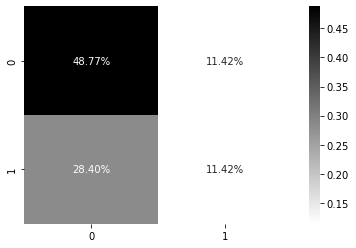

In [174]:
%run ../Project18-main/AEEEM_DATA.py

drop_list = ['LDHH_numberOfPublicAttributes', 'LDHH_numberOfPublicMethods', 'ck_oo_dit', 'LDHH_lcom', 
            'LDHH_fanIn', 'numberOfNonTrivialBugsFoundUntil:', 'CvsWEntropy', 'ck_oo_numberOfPublicAttributes', 
            'LDHH_numberOfPrivateMethods', 'WCHU_noc', 'WCHU_wmc', 'WCHU_numberOfPublicMethods', 'WCHU_lcom', 
            'LDHH_noc', 'WCHU_numberOfPrivateAttributes', 'LDHH_numberOfLinesOfCode', 
            'LDHH_numberOfPrivateAttributes', 'LDHH_fanOut', 'ck_oo_numberOfPublicMethods', 
            'WCHU_numberOfLinesOfCode', 'LDHH_wmc', 'CvsExpEntropy', 'LDHH_dit', 'WCHU_fanIn', 
            'numberOfMajorBugsFoundUntil:', 'ck_oo_numberOfMethodsInherited', 'ck_oo_numberOfPrivateMethods', 
            'LDHH_numberOfAttributesInherited', 'numberOfBugsFoundUntil:', 'numberOfCriticalBugsFoundUntil:', 
            'LDHH_numberOfMethodsInherited', 'CvsEntropy', 'WCHU_numberOfMethods', 'WCHU_fanOut', 'WCHU_rfc', 
            'ck_oo_fanOut', 'ck_oo_noc', 'ck_oo_wmc', 'LDHH_cbo']
for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)

confmatrix(AEEEM_JDT, AEEEM_EQ, LR)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'n_estimators': 100}
Total Non-defect in test data 195 Specificity:  91.0
Total Defect in test data 129 Sensitivity:  36.0
True Positives:  47 Percent:  15.0
False Negatives:  82 Percent:  25.0
True Negatives:  177 Percent:  55.00000000000001
False Positives:  18 Percent:  6.0


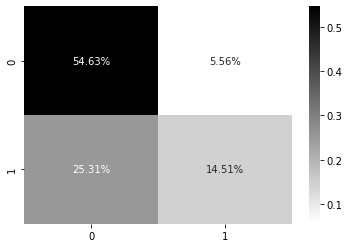

In [175]:
%run ../Project18-main/AEEEM_DATA.py

drop_list = ['ck_oo_numberOfPublicAttributes', 'numberOfNonTrivialBugsFoundUntil:', 'ck_oo_wmc', 
             'numberOfCriticalBugsFoundUntil:', 'WCHU_wmc', 'WCHU_noc', 'LDHH_lcom', 'LDHH_fanOut', 
             'ck_oo_dit', 'ck_oo_fanOut', 'numberOfMajorBugsFoundUntil:', 'LDHH_numberOfPrivateAttributes', 
             'LDHH_numberOfMethodsInherited', 'LDHH_numberOfPrivateMethods', 'LDHH_numberOfPublicMethods', 
             'LDHH_cbo', 'ck_oo_numberOfMethodsInherited', 'numberOfBugsFoundUntil:', 'LDHH_numberOfLinesOfCode', 
             'WCHU_fanIn', 'WCHU_lcom', 'WCHU_numberOfPublicMethods', 'WCHU_fanOut', 'LDHH_wmc', 'LDHH_dit', 
             'LDHH_fanIn', 'LDHH_numberOfPublicAttributes', 'WCHU_rfc', 'ck_oo_numberOfPublicMethods', 
             'CvsExpEntropy', 'ck_oo_noc', 'CvsEntropy', 'WCHU_numberOfMethods', 'LDHH_noc', 
             'LDHH_numberOfAttributesInherited']
for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)

confmatrix(AEEEM_JDT, AEEEM_EQ, random_forest)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Total Non-defect in test data 195 Specificity:  68.0
Total Defect in test data 129 Sensitivity:  79.0
True Positives:  102 Percent:  31.0
False Negatives:  27 Percent:  8.0
True Negatives:  132 Percent:  41.0
False Positives:  63 Percent:  19.0


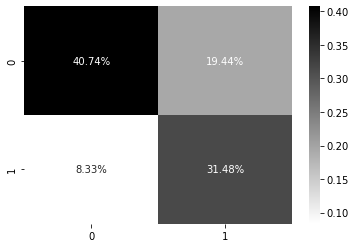

In [153]:
%run ../Project18-main/AEEEM_DATA.py

drop_list = ['ck_oo_numberOfPrivateAttributes', 'ck_oo_numberOfMethods', 'LDHH_lcom', 'LDHH_fanIn', 
             'CvsEntropy', 'ck_oo_numberOfPublicAttributes', 'LDHH_numberOfPublicMethods', 'WCHU_noc', 
             'LDHH_numberOfAttributesInherited', 'ck_oo_fanOut', 'LDHH_numberOfPrivateAttributes', 
             'LDHH_numberOfPublicAttributes', 'ck_oo_noc', 'LDHH_noc', 'WCHU_dit', 'LDHH_numberOfPrivateMethods', 
             'WCHU_numberOfAttributesInherited', 'LDHH_wmc', 'ck_oo_fanIn', 'numberOfNonTrivialBugsFoundUntil:', 
             'LDHH_numberOfAttributes', 'LDHH_numberOfLinesOfCode', 'LDHH_dit', 'CvsLinEntropy', 
             'WCHU_numberOfMethodsInherited', 'ck_oo_cbo', 'LDHH_fanOut', 'LDHH_numberOfMethodsInherited', 
             'LDHH_rfc', 'LDHH_cbo', 'WCHU_fanOut', 'ck_oo_wmc', 'WCHU_numberOfAttributes', 
             'numberOfBugsFoundUntil:', 'WCHU_lcom', 'ck_oo_rfc', 'CvsLogEntropy', 'WCHU_cbo', 
             'CvsExpEntropy', 'ck_oo_numberOfAttributes', 'WCHU_numberOfPrivateMethods', 
             'ck_oo_numberOfMethodsInherited', 'WCHU_numberOfMethods', 'ck_oo_lcom', 
             'WCHU_numberOfPublicMethods', 'numberOfMajorBugsFoundUntil:', 'ck_oo_dit', 
             'WCHU_numberOfPublicAttributes', 'WCHU_fanIn', 'numberOfHighPriorityBugsFoundUntil:', 
             'numberOfCriticalBugsFoundUntil:', 'WCHU_rfc', 'ck_oo_numberOfPublicMethods', 'WCHU_wmc']

for i in project_dict_AEEEM.values():
    drop_variables(i, drop_list)
    
confmatrix(AEEEM_JDT, AEEEM_EQ, naive_bayes)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Total Non-defect in test data 791 Specificity:  84.0
Total Defect in test data 791 Sensitivity:  62.0
True Positives:  493 Percent:  31.0
False Negatives:  298 Percent:  19.0
True Negatives:  667 Percent:  42.0
False Positives:  124 Percent:  8.0


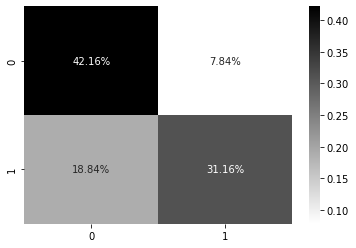

In [154]:
%run ../Project18-main/AEEEM_DATA.py

confmatrix(AEEEM_JDT, AEEEM_EQ, spectral_clustering)

# Discussion and Conclusion <a class="anchor" id="discussion"></a>

Reproducing this paper has made it clear, that it is a time-consuming task to fine-tune models. As a result, we have not been able to reach the exact same AUC performance scores, as the four Ph.D. students at the faculty of Computer Engineering were able to. We do anticipate, however, that we are on the right path. We have considered the imbalance of the datasets, the non-gaussian distributions of most of the features, and applied various machine learning techniques to most accurately predict whether a piece of software was defective.

We have found it to be generally difficult to use one project to train a model to predict another project. Simply because the % of entities that were bugged varied a lot and the datasets thus did not look alike. This is in accordance with the authors' claim that projects vary widely and thus good training data is seldomly available in this field. 

To improve our results, we have transformed the dataset to have similar distributions using log-transformation, we have implemented transformations that squeeze the data in a given range, and we have applied standardization to center the mean around 0 and implement unit variance. 

We anticipate that time and experience with machine learning have been the constraint leading to consistently lower AUC scores albeit we do deliver results of similar magnitude. 

Conclusively, it can be said that we were largely able to reproduce the study. While fine-tuning can take much time, we find that we were able to optimize most of the models to satisfactory performances. To answer our research question, we do think that Spectral Clustering has some benefits: High AUC score, low computation time, no need to drop variables and last but not least the fact that it does not require training data. However, compared to Naive Bayes in our admittedly small comparison, we do not find Spectral Clustering superior in terms of correctly classifying defect software which potentially can lead to high costs for developers. 

### Suggestion:

We would have liked to see the authors put more focus on how the models performed. One thing is to have a decent AUC score, another is to look into the two drivers: Sensitivity and Specificity. As is stated in the original paper, software engineers spend roughly 80% of their time debugging. Clearly, finding defective software is important as it is costly and time-consuming to go through it manually. Conclusively, it can be said that more focus on sensitivity would be beneficial in this context. For example, by using confusion matrices like we have done above as they provide an intuitive overview of the predictions. 

Assessing the results in the confusion matrices above, we see that despite higher AUC scores from Spectral Clustering vis a vis Naive Bayes, the latter has a much larger sensitivity. It would therefore be naive to simply deem Spectral Clustering superior based on higher AUC score. It is essential to Machine Learning that one specifies the correct objecties, and we do not think that Sensitivity and Specificty can trade of 1:1. One caveat to this argument is that we have only computed the conf-matrices on one pair of of projects from the AEEEM dataset which makes it less robust. If we have had more time we would indeed have pursued this further. 

We would also have liked to see, in the original paper, a section about how to deal with the imbalance of the data. Since some of the projects have less than 10% defect entities, loss functions could be prone to let the algorithms assign not-defect to most entities thus leading to a higher False-Negative rate.

## Scott Knot test <a class="anchor" id="snt"></a>
We would have liked to include a Scott knot test to test the significance of our findings. However, Scott Knot was designed for R which we do not apply in the class. Despite this, we have sought to implement it in python using available libraries (rpy2) found online but without success. Seemingly it does not work on OS X Laptops.

We do think, that based on our extensive and high number of iterations, we have some robust models. The Performance in itself is not strong and with AUC scores between 0.6 and 0.75 we do not think that these models are suited well for software prediction since they generally do not classify enough as a defect. Thus classifying too many false negatives. 

# Table 1 <a class="anchor" id="table1"></a> 

| Dataset | Project | # of Entities | # of Defective | % Defective |
| :- | :- | -: | -: | -: | 
| AEEEM | Eclipse JDT Core | 997 | 206 | 20.7 % |
| AEEEM | Equinox  | 324 | 129 | 39.8 % |
| AEEEM | Apache Lucene  | 691 | 64 | 9.3 % |
| AEEEM | Mylyn  | 1862 | 245 | 13.2 % |
| AEEEM | Eclipse PDE UI  | 778 | 117 | 15.0 % |
| NASA | CM1  | 505 | 48 | 9.5 % |
| NASA | KC3  | 458 | 43 | 9.4 % |
| NASA | MC2  | 161 | 52 | 32.3 % |
| NASA | MW1  | 403 | 31 | 7.7 % |
| NASA | PC1  | 1107 | 76 | 6.9 % |
| NASA | PC2  | 5589 | 23 | 0.4 % |
| NASA | PC3  | 1563 | 160 | 10.2 % |
| NASA | PC4  | 1458 | 178 | 12.2 % |
| Promise | Camel v1.6  | 965 | 188 | 19.5 % |
| Promise | IVY 1.2  | 352 | 40 | 11.4 % |
| Promise | Jedit v4.0  | 306 | 75 | 24.5 % |
| Promise | Log4j v1.0  | 135 | 34 | 25.2 % |
| Promise | Lucene v2.4  | 340 | 203 | 59.7 % |
| Promise | POI v3.0  | 442 | 281 | 63.6 % |
| Promise | Xalan v2.6  | 885 | 411 | 46.4 % |
| Promise | Xerces v1.3  | 453 | 69 | 15.2 % |




# Table 1 - After over-sampling <a class="anchor" id="table1.2"></a> 

| Dataset | Project | # of Entities | # of Defective | % Defective |
| :- | :- | -: | -: | -: | 
| AEEEM | Eclipse JDT Core | 1582 | 791 | 50.0 % |
| AEEEM | Equinox  | 390 | 195 | 50.0 % |
| AEEEM | Apache Lucene  | 1254 | 657 | 50.0 % |
| AEEEM | Mylyn  | 3234 | 1627 | 50.0 % |
| AEEEM | Eclipse PDE UI  | 1322 | 661 | 50.0 % |
| NASA | CM1  | 914 | 457 | 50.0 % |
| NASA | KC3  | 830 | 414 | 50.0 % |
| NASA | MC2  | 214 | 107 | 50.0 % |
| NASA | MW1  | 744 | 372 | 50.0 % |
| NASA | PC1  | 2062 | 1031 | 50.0 % |
| NASA | PC2  | 11132 | 5566 | 50.0 % |
| NASA | PC3  | 2806 | 1403 | 50.0 % |
| NASA | PC4  | 2560 | 1280 | 50.0 % |
| Promise | Camel v1.6  | 1554 | 777 | 50.0 % |
| Promise | IVY 1.2  | 624 | 312 | 50.0 % |
| Promise | Jedit v4.0  | 462 | 231 | 50.0 % |
| Promise | Log4j v1.0  | 202 | 101 | 50.0 % |
| Promise | Lucene v2.4  | 406 | 203 | 50.0 % |
| Promise | POI v3.0  | 562 | 281 | 50.0 % |
| Promise | Xalan v2.6  | 948 | 474 | 50.0 % |
| Promise | Xerces v1.3  | 768 | 384 | 50.0 % |

In [145]:
#Proof that the resample function balances the datasets.
AEEEM_JDT=resample(AEEEM_JDT)
AEEEM_EQ=resample(AEEEM_EQ)
AEEEM_LC=resample(AEEEM_LC)
AEEEM_ML=resample(AEEEM_ML)
AEEEM_PDE=resample(AEEEM_PDE)

NASA_CM1=resample(NASA_CM1)
NASA_KC3=resample(NASA_KC3)
NASA_MC2=resample(NASA_MC2)
NASA_MW1=resample(NASA_MW1)
NASA_PC1=resample(NASA_PC1)
NASA_PC2=resample(NASA_PC2)
NASA_PC3=resample(NASA_PC3)
NASA_PC4=resample(NASA_PC4)

PROMISE_Camel_v_1_6=resample(PROMISE_Camel_v_1_6)
PROMISE_IVY_1_2=resample(PROMISE_IVY_1_2)
PROMISE_Jedit_v_4_0=resample(PROMISE_Jedit_v_4_0)
PROMISE_Log4j_v_1_0=resample(PROMISE_Log4j_v_1_0)
PROMISE_Lucene_v_2_4=resample(PROMISE_Lucene_v_2_4)
PROMISE_POI_v_3_0=resample(PROMISE_POI_v_3_0)
PROMISE_Xalan_v_2_6=resample(PROMISE_Xalan_v_2_6)
PROMISE_Xerces_v_1_3=resample(PROMISE_Xerces_v_1_3)

In [ ]:
#Run this one to see the percentage of bugged entities.
investigate_df(AEEEM_JDT)
investigate_df(AEEEM_EQ)
investigate_df(AEEEM_LC)
investigate_df(AEEEM_ML)
investigate_df(AEEEM_PDE)

investigate_df(NASA_CM1)
investigate_df(NASA_KC3)
investigate_df(NASA_MC2)
investigate_df(NASA_MW1)
investigate_df(NASA_PC1)
investigate_df(NASA_PC2)
investigate_df(NASA_PC3)
investigate_df(NASA_PC4)

investigate_df(PROMISE_Camel_v_1_6)
investigate_df(PROMISE_IVY_1_2)
investigate_df(PROMISE_Jedit_v_4_0)
investigate_df(PROMISE_Log4j_v_1_0)
investigate_df(PROMISE_Lucene_v_2_4)
investigate_df(PROMISE_POI_v_3_0)
investigate_df(PROMISE_Xalan_v_2_6)
investigate_df(PROMISE_Xerces_v_1_3)

# APPENDIX 1 - DATA TABLE NAMES <a class="anchor" id="appendix1"></a> 
| Metric                            | Description                                                  |
| --------------------------------- | ------------------------------------------------------------ |
| classname                         | Name of the class                                            |
| numberOfVersionsUntil. (NR)       | Number of versions (revisions) before last release           |
| numberOfFixesUntil. (NFIX)        | Number of fixes before last release                          |
| numberOfRefactoringsUntil. (NREF) | Number of refactorings before last release                   |
| numberOfAuthorsUntil. (NAUTH)     | Number of authors before last release                        |
| linesAddedUntil.                  | Sum of all the lines added between all the revisions (before last release) |
| maxLinesAddedUntil.               | Maximum number of lines added in a single revision           |
| avgLinesAddedUntil.               | Average number of lines added in a single revision           |
| linesRemovedUntil.                | Sum of all the lines removed between all the revisions (before last release) |
| maxLinesRemovedUntil.             | Maximum number of lines removed in a single revision         |
| avgLinesRemovedUntil.             | Average number of lines removed in a single revision         |
| codeChurnUntil.                   | How many times the class has been edited between all the revisions before last release |
| maxCodeChurnUntil.                | Maximum number of times the class has been edited in a single revision |
| avgCodeChurnUntil.                | Average number of times the class has been edited in a single revision |
| ageWithRespectTo.                 | Age of the class                                             |
| weightedAgeWithRespectTo.         | Weighted age of the class                                    |
| bugs                              | Number of bugs found after last release                      |
| nonTrivialBugs                    | Number of non trivial bugs found after last release          |
| majorBugs                         | Number of major bugs found after last release                |
| criticalBugs                      | Number of critical bugs found after last release             |
| highPriorityBugs                  | Number of high priority bugs found after last release        |


| Metric                 | Description                                                  |
| ---------------------- | ------------------------------------------------------------ |
| classname              | Name of the class                                            |
| CvsEntropy (HCM)       | History of complexity metric                                 |
| CvsWEntropy (WHCM)     | Weighted history of complexity metric                        |
| CvsLinEntropy (LDHCM)  | Linearly decayed history of complexity metric (the contributions given by every change decay linearly) |
| CvsLogEntropy (LGDHCM) | Logarithmically decayed history of complexity metric (the contributions given by every change decay logarithmically) |
| CvsExpEntropy (EDHCM)  | Exponentially decayed history of complexity metric (the contributions given by every change decay exponentially) |


| Metric                              | Description                                            |
| ----------------------------------- | ------------------------------------------------------ |
| classname                           | Name of the class                                      |
| numberOfBugsFoundUntil.             | Number of bugs found before last release               |
| numberOfNonTrivialBugsFoundUntil.   | Number of non trivial bugs found before last release   |
| numberOfMajorBugsFoundUntil.        | Number of major bugs found before last release         |
| numberOfCriticalBugsFoundUntil.     | Number of critical bugs found before last release      |
| numberOfHighPriorityBugsFoundUntil. | Number of high priority bugs found before last release |
| bugs                                | Number of bugs found after last release                |
| nonTrivialBugs                      | Number of non trivial bugs found after last release    |
| majorBugs                           | Number of major bugs found after last release          |
| criticalBugs                        | Number of critical bugs found after last release       |
| highPriorityBugs                    | Number of high priority bugs found after last release  |

* Contains all the CK (from the Chidamber and Kemerer suite) and OO (object-oriented) metrics.

| Metric                             | Description                                             |
| ---------------------------------- | ------------------------------------------------------- |
| classname                          | Name of the class                                       |
| cbo                                | Coupling between objects (CK)                           |
| dit                                | Depth of inheritance tree (CK)                          |
| fanIn                              | Number of classes that reference the class (OO)         |
| fanOut                             | Number of classes that are referenced by the class (OO) |
| lcom                               | Lack of cohesion in methods (CK)                        |
| noc                                | Number of children (CK)                                 |
| numberOfAttributes (NOA)           | Number of attributes in the class (OO)                  |
| numberOfAttributesInherited (NOAI) | Number of attributes inherited by the class (OO)        |
| numberOfLinesOfCode (LOC)          | Lines of code (OO)                                      |
| numberOfMethods (NOM)              | Number of methods in the class (OO)                     |
| numberOfMethodsInherited (NOMI)    | Number of methods inherited by the class (OO)           |
| numberOfPrivateAttributes (NOPRA)  | Number of private attributes in the class (OO)          |
| numberOfPrivateMethods (NOPRM)     | Number of private methods in the class (OO)             |
| numberOfPublicAttributes (NOPA)    | Number of public attributes in the class (OO)           |
| numberOfPublicMethods (NOPM)       | Number of public methods in the class (OO)              |
| rfc                                | Response for class (CK)                                 |
| wmc                                | Weighted method count (CK)                              |
| bugs                               | Number of bugs found after last release                 |
| nonTrivialBugs                     | Number of non trivial bugs found after last release     |
| majorBugs                          | Number of major bugs found after last release           |
| criticalBugs                       | Number of critical bugs found after last release        |
| highPriorityBugs                   | Number of high priority bugs found after last release   |

* Contains the entropy calculated for every CK and OO metric.

| Metric                      | Description                                           |
| --------------------------- | ----------------------------------------------------- |
| cbo                         | Entropy for cbo                                       |
| dit                         | Entropy for dit                                       |
| fanIn                       | Entropy for fanIn                                     |
| fanOut                      | Entropy for fanOut                                    |
| lcom                        | Entropy for lcom                                      |
| noc                         | Entropy for noc                                       |
| numberOfAttributes          | Entropy for numberOfAttributes                        |
| numberOfAttributesInherited | Entropy for numberOfAttributesInherited               |
| numberOfLinesOfCode         | Entropy for numberOfLinesOfCode                       |
| numberOfMethods             | Entropy for numberOfMethods                           |
| numberOfMethodsInherited    | Entropy for numberOfMethodsInherited                  |
| numberOfPrivateAttributes   | Entropy for numberOfPrivateAttributes                 |
| numberOfPrivateMethods      | Entropy for numberOfPrivateMethods                    |
| numberOfPublicAttributes    | Entropy for numberOfPublicAttributes                  |
| numberOfPublicMethods       | Entropy for numberOfPublicMethods                     |
| rfc                         | Entropy for rfc                                       |
| wmc                         | Entropy for wmc                                       |
| bugs                        | Number of bugs found after last release               |
| nonTrivialBugs              | Number of non trivial bugs found after last release   |
| majorBugs                   | Number of major bugs found after last release         |
| criticalBugs                | Number of critical bugs found after last release      |
| highPriorityBugs            | Number of high priority bugs found after last release |

* Contains the code churn calculated for every CK and OO metric. The code churn measures how frequently the metrics have changed in time. Classes with very high code churn for many metrics will have more bugs.

| Metric                      | Description                                           |
| --------------------------- | ----------------------------------------------------- |
| cbo                         | Code churn cbo                                        |
| dit                         | Code churn dit                                        |
| fanIn                       | Code churn fanIn                                      |
| fanOut                      | Code churn fanOut                                     |
| lcom                        | Code churn lcom                                       |
| noc                         | Code churn noc                                        |
| numberOfAttributes          | Code churn numberOfAttributes                         |
| numberOfAttributesInherited | Code churn numberOfAttributesInherited                |
| numberOfLinesOfCode         | Code churn numberOfLinesOfCode                        |
| numberOfMethods             | Code churn numberOfMethods                            |
| numberOfMethodsInherited    | Code churn numberOfMethodsInherited                   |
| numberOfPrivateAttributes   | Code churn numberOfPrivateAttributes                  |
| numberOfPrivateMethods      | Code churn numberOfPrivateMethods                     |
| numberOfPublicAttributes    | Code churn numberOfPublicAttributes                   |
| numberOfPublicMethods       | Code churn numberOfPublicMethods                      |
| rfc                         | Code churn rfc                                        |
| wmc                         | Code churn wmc                                        |
| bugs                        | Number of bugs found after last release               |
| nonTrivialBugs              | Number of non trivial bugs found after last release   |
| majorBugs                   | Number of major bugs found after last release         |
| criticalBugs                | Number of critical bugs found after last release      |
| highPriorityBugs            | Number of high priority bugs found after last release |

NB: to access the tables containing transformations of these code churn values, it is necessary to add the transformation option (which can be exp, lin, log, weighted).

* Contains data about how each CK metric changes over time, for every class. 

| Time      | Description                                                  |
| --------- | ------------------------------------------------------------ |
| classname | Name of the class                                            |
| Time 1    | First value recorded of the selected metric                  |
| Time 2    | Second value recorded of the selected metric (recorded after two weeks from the first) |
| ...       | ...                                                          |
| Time 50   | Last value recorded of the selected metric (2 years and 1 month after the first value recorded) |

NB: when the value of the metric hasn't changed between one time and the other, its value is set to -1.

* Contains complexity metrics and values for the abstract syntax tree nodes at the file level.

Note: FOUT_sum is the same as fanOut 

| Complexity Metrics | Description                            |
| ------------------ | -------------------------------------- |
| plugin             | Name of the plugin                     |
| filename           | Name of the file                       |
| pre                | Pre release number of defects          |
| post               | Post release number of defects         |
| ACD                | Number of anonymous type declarations  |
| FOUT_avg           | Average number of method calls         |
| FOUT_max           | Maximum number of method calls         |
| FOUT_sum           | Sum of all method calls                |
| MLOC_avg           | Method lines of code                   |
| MLOC_max           | Maximum method lines of code           |
| MLOC_sum           | Sum of all method lines of code        |
| NBD_avg            | Average nested block depth             |
| NBD_max            | Maximum nested block depth             |
| NBD_sum            | Sum of nested block depth              |
| NOF_avg            | Average number of fields               |
| NOF_max            | Maximum number of fields               |
| NOF_sum            | Sum of number of fields                |
| NOI_avg            | Average number of interfaces           |
| NOI_max            | Maximum number of interfaces           |
| NOI_sum            | Sum of number of interfaces            |
| NOM_avg            | Average number of methods              |
| NOM_max            | Maximum number of methods              |
| NOM_sum            | Sum of number of methods               |
| NOT                | Number of classes                      |
| NSF_avg            | Average number of static fields        |
| NSF_max            | Maximum number of static fields        |
| NSF_sum            | Sum of number of static fields         |
| NSM_avg            | Average number of static methods       |
| NSM_max            | Maximum number of static methods       |
| NSM_sum            | Sum of number of static methods        |
| PAR_avg            | Average number of parameters           |
| PAR_max            | Maximum number of parameters           |
| PAR_sum            | Sum of number of parameters            |
| TLOC               | Total lines of code                    |
| VG_avg             | Average McCabe's cyclomatic complexity |
| VG_max             | Maximum McCabe's cyclomatic complexity |
| VG_sum             | Sum of McCabe's cyclomatic complexity  |

* Contains complexity metrics and values for the abstract syntax tree nodes at the package level.

In this type of table the average, maximum and sum of ACD, NOT and TLOC have been computed (not the single values). Also the variable NOCU has been added (number of files for every package).

| Complexity Metrics | Description                                   |
| ------------------ | --------------------------------------------- |
| plugin             | Name of the plugin                            |
| packagename        | Name of the package                           |
| pre                | Pre release number of defects                 |
| post               | Post release number of defects                |
| ACD_avg            | Average number of anonymous type declarations |
| ACD_max            | Maximum number of anonymous type declarations |
| ACD_sum            | Sum of number of anonymous type declarations  |
| FOUT_avg           | Average number of method calls                |
| FOUT_max           | Maximum number of method calls                |
| FOUT_sum           | Sum of all method calls                       |
| MLOC_avg           | Method lines of code                          |
| MLOC_max           | Maximum method lines of code                  |
| MLOC_sum           | Sum of all method lines of code               |
| NBD_avg            | Average nested block depth                    |
| NBD_max            | Maximum nested block depth                    |
| NBD_sum            | Sum of nested block depth                     |
| NOCU               | Number of compilation units (files)           |
| NOF_avg            | Average number of fields                      |
| NOF_max            | Maximum number of fields                      |
| NOF_sum            | Sum of number of fields                       |
| NOI_avg            | Average number of interfaces                  |
| NOI_max            | Maximum number of interfaces                  |
| NOI_sum            | Sum of number of interfaces                   |
| NOM_avg            | Average number of methods                     |
| NOM_max            | Maximum number of methods                     |
| NOM_sum            | Sum of number of methods                      |
| NOT_avg            | Average number of classes                     |
| NOT_max            | Maximum number of classes                     |
| NOT_sum            | Sum of number of classes                      |
| NSF_avg            | Average number of static fields               |
| NSF_max            | Maximum number of static fields               |
| NSF_sum            | Sum of number of static fields                |
| NSM_avg            | Average number of static methods              |
| NSM_max            | Maximum number of static methods              |
| NSM_sum            | Sum of number of static methods               |
| PAR_avg            | Average number of parameters                  |
| PAR_max            | Maximum number of parameters                  |
| PAR_sum            | Sum of number of parameters                   |
| TLOC_avg           | Average number of total lines of code         |
| TLOC_max           | Maximum number of total lines of code         |
| TLOC_sum           | Sum of number of total lines of code          |
| VG_avg             | Average McCabe's cyclomatic complexity        |
| VG_max             | Maximum McCabe's cyclomatic complexity        |
| VG_sum             | Sum of McCabe's cyclomatic complexity         |

* Contains burst metrics at hourly time intervals. 

| Metric                          | Description                                                  |
| ------------------------------- | ------------------------------------------------------------ |
| filename                        | Name of the class                                            |
| TotalPeopleInBurst              | Number of people involved across all bursts                  |
| MaximumCodeBurstLate            | Maximum late code bursts                                     |
| NumberOfChanges                 | Number of builds in which the component has changed          |
| MaxPeopleInBurst                | Across all bursts, maximum number of people involved         |
| TotalBurstSizeLate              | Total size of late bursts                                    |
| NumberCodeBurstsLate            | Number of late code bursts                                   |
| NumberOfChangesLate             | Number of late builds in which the component has changed     |
| NumberOfChangesEarly            | Number of early builds in which the component has changed    |
| MaxChurnInBurst                 | Maximum code churn across all bursts                         |
| MaximumCodeBurstEarly           | Maximum number of early code bursts                          |
| NumberCodeBurstsEarly           | Number of early code bursts                                  |
| TimeFirstBurst                  | Time when the first burst occurred                           |
| TotalChurnInBurst               | Total code churn in all change bursts                        |
| ChurnTotal                      | Total code churn during the lifetime of a component          |
| MaximumCodeBurst                | Maximum number of code bursts                                |
| NumberOfConsecutiveChangesEarly | Number of early consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| NumberConsecutiveChangesLate    | Number of late consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TotalBurstSizeEarly             | Total size of early bursts                                   |
| TotalBurstSize                  | Total size of all bursts                                     |
| TimeMaxBurst                    | Time when the maximum burst occurred                         |
| NumberOfConsecutiveChanges      | Number of consecutive changes (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TimeLastBurst                   | Time when the last burst occurred                            |
| NumberCodeBursts                | Number of code bursts                                        |
| PeopleTotal                     | Number of people who ever committed a change to the component |

At hourly time intervals we don't have a column with the number of bugs, so this data will be suited for unsupervised learning.

Contains burst metrics at daily time intervals, at the class level.

| Metric                          | Description                                                  |
| ------------------------------- | ------------------------------------------------------------ |
| filename                        | Name of the class                                            |
| TotalPeopleInBurst              | Number of people involved across all bursts                  |
| MaximumCodeBurstLate            | Maximum late code bursts                                     |
| NumberOfChanges                 | Number of builds in which the component has changed          |
| MaxPeopleInBurst                | Across all bursts, maximum number of people involved         |
| TotalBurstSizeLate              | Total size of late bursts                                    |
| NumberCodeBurstsLate            | Number of late code bursts                                   |
| NumberOfChangesLate             | Number of late builds in which the component has changed     |
| NumberOfChangesEarly            | Number of early builds in which the component has changed    |
| MaxChurnInBurst                 | Maximum code churn across all bursts                         |
| MaximumCodeBurstEarly           | Maximum number of early code bursts                          |
| NumberCodeBurstsEarly           | Number of early code bursts                                  |
| TimeFirstBurst                  | Time when the first burst occurred                           |
| TotalChurnInBurst               | Total code churn in all change bursts                        |
| ChurnTotal                      | Total code churn during the lifetime of a component          |
| MaximumCodeBurst                | Maximum number of code bursts                                |
| NumberOfConsecutiveChangesEarly | Number of early consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| NumberConsecutiveChangesLate    | Number of late consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TotalBurstSizeEarly             | Total size of early bursts                                   |
| TotalBurstSize                  | Total size of all bursts                                     |
| TimeMaxBurst                    | Time when the maximum burst occurred                         |
| NumberOfConsecutiveChanges      | Number of consecutive changes (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TimeLastBurst                   | Time when the last burst occurred                            |
| NumberCodeBursts                | Number of code bursts                                        |
| PeopleTotal                     | Number of people who ever committed a change to the component |
| bugs                            | Number of bugs                                               |

* Contains burst metrics at daily time intervals, at the package level. Also contains the same package metrics as the type ecl_package_Version from the above datasets.

| Metric                          | Description                                                  |
| ------------------------------- | ------------------------------------------------------------ |
| filename                        | Name of the package                                          |
| TotalPeopleInBurst              | Number of people involved across all bursts                  |
| MaximumCodeBurstLate            | Maximum late code bursts                                     |
| NumberOfChanges                 | Number of builds in which the component has changed          |
| MaxPeopleInBurst                | Across all bursts, maximum number of people involved         |
| TotalBurstSizeLate              | Total size of late bursts                                    |
| NumberCodeBurstsLate            | Number of late code bursts                                   |
| NumberOfChangesLate             | Number of late builds in which the component has changed     |
| NumberOfChangesEarly            | Number of early builds in which the component has changed    |
| MaxChurnInBurst                 | Maximum code churn across all bursts                         |
| MaximumCodeBurstEarly           | Maximum number of early code bursts                          |
| NumberCodeBurstsEarly           | Number of early code bursts                                  |
| TimeFirstBurst                  | Time when the first burst occurred                           |
| TotalChurnInBurst               | Total code churn in all change bursts                        |
| ChurnTotal                      | Total code churn during the lifetime of a component          |
| MaximumCodeBurst                | Maximum number of code bursts                                |
| NumberOfConsecutiveChangesEarly | Number of early consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| NumberConsecutiveChangesLate    | Number of late consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TotalBurstSizeEarly             | Total size of early bursts                                   |
| TotalBurstSize                  | Total size of all bursts                                     |
| TimeMaxBurst                    | Time when the maximum burst occurred                         |
| NumberOfConsecutiveChanges      | Number of consecutive changes (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TimeLastBurst                   | Time when the last burst occurred                            |
| NumberCodeBursts                | Number of code bursts                                        |
| PeopleTotal                     | Number of people who ever committed a change to the component |
| pre                             | Pre release number of defects                                |
| NumberOfDefects                 | Post release number of defects (equal to "post" from above)  |
| ACD_avg                         | Average number of anonymous type declarations                |
| ACD_max                         | Maximum number of anonymous type declarations                |
| ACD_sum                         | Sum of number of anonymous type declarations                 |
| FOUT_avg                        | Average number of method calls                               |
| FOUT_max                        | Maximum number of method calls                               |
| FOUT_sum                        | Sum of all method calls                                      |
| MLOC_avg                        | Method lines of code                                         |
| MLOC_max                        | Maximum method lines of code                                 |
| MLOC_sum                        | Sum of all method lines of code                              |
| NBD_avg                         | Average nested block depth                                   |
| NBD_max                         | Maximum nested block depth                                   |
| NBD_sum                         | Sum of nested block depth                                    |
| NOCU                            | Number of compilation units (files)                          |
| NOF_avg                         | Average number of fields                                     |
| NOF_max                         | Maximum number of fields                                     |
| NOF_sum                         | Sum of number of fields                                      |
| NOI_avg                         | Average number of interfaces                                 |
| NOI_max                         | Maximum number of interfaces                                 |
| NOI_sum                         | Sum of number of interfaces                                  |
| NOM_avg                         | Average number of methods                                    |
| NOM_max                         | Maximum number of methods                                    |
| NOM_sum                         | Sum of number of methods                                     |
| NOT_avg                         | Average number of classes                                    |
| NOT_max                         | Maximum number of classes                                    |
| NOT_sum                         | Sum of number of classes                                     |
| NSF_avg                         | Average number of static fields                              |
| NSF_max                         | Maximum number of static fields                              |
| NSF_sum                         | Sum of number of static fields                               |
| NSM_avg                         | Average number of static methods                             |
| NSM_max                         | Maximum number of static methods                             |
| NSM_sum                         | Sum of number of static methods                              |
| PAR_avg                         | Average number of parameters                                 |
| PAR_max                         | Maximum number of parameters                                 |
| PAR_sum                         | Sum of number of parameters                                  |
| TLOC_avg                        | Average number of total lines of code                        |
| TLOC_max                        | Maximum number of total lines of code                        |
| TLOC_sum                        | Sum of number of total lines of code                         |
| VG_avg                          | Average McCabe's cyclomatic complexity                       |
| VG_max                          | Maximum McCabe's cyclomatic complexity                       |
| VG_sum                          | Sum of McCabe's cyclomatic complexity                        |

Contains burst metrics at weekly time intervals, at the class level. Also contains the same class metrics as the type ecl_file_Version from the above datasets.

| Metric                          | Description                                                  |
| ------------------------------- | ------------------------------------------------------------ |
| filename                        | Name of the class                                            |
| TotalPeopleInBurst              | Number of people involved across all bursts                  |
| MaximumCodeBurstLate            | Maximum late code bursts                                     |
| NumberOfChanges                 | Number of builds in which the component has changed          |
| MaxPeopleInBurst                | Across all bursts, maximum number of people involved         |
| TotalBurstSizeLate              | Total size of late bursts                                    |
| NumberCodeBurstsLate            | Number of late code bursts                                   |
| NumberOfChangesLate             | Number of late builds in which the component has changed     |
| NumberOfChangesEarly            | Number of early builds in which the component has changed    |
| MaxChurnInBurst                 | Maximum code churn across all bursts                         |
| MaximumCodeBurstEarly           | Maximum number of early code bursts                          |
| NumberCodeBurstsEarly           | Number of early code bursts                                  |
| TimeFirstBurst                  | Time when the first burst occurred                           |
| TotalChurnInBurst               | Total code churn in all change bursts                        |
| ChurnTotal                      | Total code churn during the lifetime of a component          |
| MaximumCodeBurst                | Maximum number of code bursts                                |
| NumberOfConsecutiveChangesEarly | Number of early consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| NumberConsecutiveChangesLate    | Number of late consecutive builds (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TotalBurstSizeEarly             | Total size of early bursts                                   |
| TotalBurstSize                  | Total size of all bursts                                     |
| TimeMaxBurst                    | Time when the maximum burst occurred                         |
| NumberOfConsecutiveChanges      | Number of consecutive changes (takes into account all consecutive changes, not just bursts exceeding a certain size) |
| TimeLastBurst                   | Time when the last burst occurred                            |
| NumberCodeBursts                | Number of code bursts                                        |
| PeopleTotal                     | Number of people who ever committed a change to the component |
| pre                             | Pre release number of defects                                |
| NumberOfDefects                 | Post release number of defects (equal to "post" from above)  |
| ACD                             | Number of anonymous type declarations                        |
| FOUT_avg                        | Average number of method calls                               |
| FOUT_max                        | Maximum number of method calls                               |
| FOUT_sum                        | Sum of all method calls                                      |
| MLOC_avg                        | Method lines of code                                         |
| MLOC_max                        | Maximum method lines of code                                 |
| MLOC_sum                        | Sum of all method lines of code                              |
| NBD_avg                         | Average nested block depth                                   |
| NBD_max                         | Maximum nested block depth                                   |
| NBD_sum                         | Sum of nested block depth                                    |
| NOF_avg                         | Average number of fields                                     |
| NOF_max                         | Maximum number of fields                                     |
| NOF_sum                         | Sum of number of fields                                      |
| NOI_avg                         | Average number of interfaces                                 |
| NOI_max                         | Maximum number of interfaces                                 |
| NOI_sum                         | Sum of number of interfaces                                  |
| NOM_avg                         | Average number of methods                                    |
| NOM_max                         | Maximum number of methods                                    |
| NOM_sum                         | Sum of number of methods                                     |
| NOT                             | Number of classes                                            |
| NSF_avg                         | Average number of static fields                              |
| NSF_max                         | Maximum number of static fields                              |
| NSF_sum                         | Sum of number of static fields                               |
| NSM_avg                         | Average number of static methods                             |
| NSM_max                         | Maximum number of static methods                             |
| NSM_sum                         | Sum of number of static methods                              |
| PAR_avg                         | Average number of parameters                                 |
| PAR_max                         | Maximum number of parameters                                 |
| PAR_sum                         | Sum of number of parameters                                  |
| TLOC                            | Total lines of code                                          |
| VG_avg                          | Average McCabe's cyclomatic complexity                       |
| VG_max                          | Maximum McCabe's cyclomatic complexity                       |
| VG_sum                          | Sum of McCabe's cyclomatic complexity                        |


| Metric                           | Description                                                  |
| -------------------------------- | ------------------------------------------------------------ |
| LOC_BLANK                        | Number of blank lines of code                                |
| BRANCH_COUNT                     | Number of logical branches                                   |
| CALL_PAIRS                       | Executable calls between modules                             |
| LOC_CODE_AND_COMMENT             | Lines of code + lines of comment                             |
| LOC_COMMENTS                     | Lines of comment                                             |
| CONDITION_COUNT                  | Number of conditions                                         |
| CYCLOMATIC_COMPLEXITY            | McCabe's cyclomatic complexity (maximum number of linearly independent paths through a program's source code, computed from the control-flow graph). It's the number of conditional branches in the control-flow graph. M = E - N + 2P (E number of edges, N number of nodes, P number of connected components). Also called v(G). |
| CYCLOMATIC_DENSITY               | Cyclomatic complexity divided by the size of the system (in source statements) |
| DECISION_COUNT                   | Number of decisions                                          |
| DECISION_DENSITY                 | Number of decisions divided by the size of the system        |
| DESIGN_COMPLEXITY                | Number of paths which call something                         |
| DESIGN_DENSITY                   | Design complexity divided by cyclomatic complexity (total paths) |
| EDGE_COUNT                       | Number of edges of the control-flow graph                    |
| ESSENTIAL_COMPLEXITY             | ESSCOM = (NONREDUC+1) + (ENTRYPT-1) + (TERMPT-1) Essential complexity is the sum of nonreducible nodes plus one, plus one for each entry point after the first, plus one for each termination point after the first. It's basically the complexity of the reduced flowgraph (from which the structured constructs have been removed). Called ev(G) |
| ESSENTIAL_DENSITY                | (ESSCOM-1) / (v(G)-1)                                        |
| LOC_EXECUTABLE                   | Lines of executable code                                     |
| PARAMETER_COUNT                  | Number of parameters                                         |
| GLOBAL_DATA_COMPLEXITY           | Complexity of the global data reduced flowgraph (count of paths through global data) |
| GLOBAL_DATA_DENSITY              | GLOBAL_DATA_COMPLEXITY divided by v(G).                      |
| HALSTEAD_CONTENT                 | Equal to L * V (L level, V volume). It represents the complexity regardless of the language used |
| HALSTEAD_DIFFICULTY              | Error proneness of the program, computed as D=(UOP/2)*(OD/UOD) |
| HALSTEAD_EFFORT                  | E = D * V (D difficulty, V volume). It represents the mental effort required to develop or maintain a class |
| HALSTEAD_ERROR_EST               | Estimated Halstead error                                     |
| HALSTEAD_LENGTH                  | Total of all the lengths in the classes                      |
| HALSTEAD_LEVEL                   | L = 1 / D                                                    |
| HALSTEAD_PROG_TIME               | Time (in seconds) to implement a program: T = E / 18 (E Halstead effort). The number 18 comes from empirical experiments |
| HALSTEAD_VOLUME                  | Total of all the volumes in the methods (the volume V is the information content of a program, measured in mathematical bits: V=length(program)*log2(UOD+UOP)). The length(program) = OP+OD. |
| MAINTENANCE_SEVERITY             | ev(G) / v(G) = Essential complexity divided by Cyclomatic complexity |
| MODIFIED_CONDITION_COUNT         | Count for MC/DC (Modified Condition/Decision Coverage)       |
| MULTIPLE_CONDITION_COUNT         | Count for MCC (Multiple Condition Coverage)                  |
| NODE_COUNT                       | Number of nodes in the control-flow graph                    |
| NORMALIZED_CYCLOMATIC_COMPLEXITY | Normalized McCabe's cyclomatic complexity                    |
| NUM_OPERANDS                     | Number of operands (OD)                                      |
| NUM_OPERATORS                    | Number of operators (OP)                                     |
| NUM_UNIQUE_OPERANDS              | Number of unique operands (UOD)                              |
| NUM_UNIQUE_OPERATORS             | Number of unique operators (UOP)                             |
| NUMBER_OF_LINES                  | Number of lines                                              |
| PATHOLOGICAL_COMPLEXITY          | Measures the degree to which a module contains extremely unstructured constructs. Also called pv(G) |
| PERCENT_COMMENTS                 | Percentage of comments in the total lines of code            |
| LOC_TOTAL                        | Total lines of code                                          |
| Defective                        | Y if the class is defective, N if not                        |


| Metric                           | Description                                                  |
| -------------------------------- | ------------------------------------------------------------ |
| LOC_BLANK                        | Number of blank lines of code                                |
| BRANCH_COUNT                     | Number of logical branches                                   |
| CALL_PAIRS                       | Executable calls between modules                             |
| LOC_CODE_AND_COMMENT             | Lines of code + lines of comment                             |
| LOC_COMMENTS                     | Lines of comment                                             |
| CONDITION_COUNT                  | Number of conditions                                         |
| CYCLOMATIC_COMPLEXITY            | McCabe's cyclomatic complexity (maximum number of linearly independent paths through a program's source code, computed from the control-flow graph). It's the number of conditional branches in the control-flow graph. M = E - N + 2P (E number of edges, N number of nodes, P number of connected components). Also called v(G). |
| CYCLOMATIC_DENSITY               | Cyclomatic complexity divided by the size of the system (in source statements) |
| DECISION_COUNT                   | Number of decisions                                          |
| DECISION_DENSITY                 | Number of decisions divided by the size of the system        |
| DESIGN_COMPLEXITY                | Number of paths which call something                         |
| DESIGN_DENSITY                   | Design complexity divided by cyclomatic complexity (total paths) |
| EDGE_COUNT                       | Number of edges of the control-flow graph                    |
| ESSENTIAL_COMPLEXITY             | ESSCOM = (NONREDUC+1) + (ENTRYPT-1) + (TERMPT-1) Essential complexity is the sum of nonreducible nodes plus one, plus one for each entry point after the first, plus one for each termination point after the first. It's basically the complexity of the reduced flowgraph (from which the structured constructs have been removed). Called ev(G) |
| ESSENTIAL_DENSITY                | (ESSCOM-1) / (v(G)-1)                                        |
| LOC_EXECUTABLE                   | Lines of executable code                                     |
| PARAMETER_COUNT                  | Number of parameters                                         |
| HALSTEAD_CONTENT                 | Equal to L * V (L level, V volume). It represents the complexity regardless of the language used |
| HALSTEAD_DIFFICULTY              | Error proneness of the program, computed as D=(UOP/2)*(OD/UOD) |
| HALSTEAD_EFFORT                  | E = D * V (D difficulty, V volume). It represents the mental effort required to develop or maintain a class |
| HALSTEAD_ERROR_EST               | Estimated Halstead error                                     |
| HALSTEAD_LENGTH                  | Total of all the lengths in the classes                      |
| HALSTEAD_LEVEL                   | L = 1 / D                                                    |
| HALSTEAD_PROG_TIME               | Time (in seconds) to implement a program: T = E / 18 (E Halstead effort). The number 18 comes from empirical experiments |
| HALSTEAD_VOLUME                  | Total of all the volumes in the methods (the volume V is the information content of a program, measured in mathematical bits: V=length(program)*log2(UOD+UOP)). The length(program) = OP+OD. |
| MAINTENANCE_SEVERITY             | ev(G) / v(G) = Essential complexity divided by Cyclomatic complexity |
| MODIFIED_CONDITION_COUNT         | Count for MC/DC (Modified Condition/Decision Coverage)       |
| MULTIPLE_CONDITION_COUNT         | Count for MCC (Multiple Condition Coverage)                  |
| NODE_COUNT                       | Number of nodes in the control-flow graph                    |
| NORMALIZED_CYCLOMATIC_COMPLEXITY | Normalized McCabe's cyclomatic complexity                    |
| NUM_OPERANDS                     | Number of operands (OD)                                      |
| NUM_OPERATORS                    | Number of operators (OP)                                     |
| NUM_UNIQUE_OPERANDS              | Number of unique operands (UOD)                              |
| NUM_UNIQUE_OPERATORS             | Number of unique operators (UOP)                             |
| NUMBER_OF_LINES                  | Number of lines                                              |
| PERCENT_COMMENTS                 | Percentage of comments in the total lines of code            |
| LOC_TOTAL                        | Total lines of code                                          |
| Defective                        | Y if the class is defective, N if not                        |


| Metric    | Description                    |
| --------- | ------------------------------ |
| ID        | Class ID                       |
| Name      | Class name                     |
| LongName  | Extended class name            |
| Parent    | Parent ID                      |
| Component | Component ID                   |
| Path      | Directory path                 |
| Line      | Starting line                  |
| Column    | Starting column                |
| EndLine   | Ending line                    |
| EndColumn | Ending column                  |
| CC        | Cyclomatic complexity          |
| CCL       | Not available                               |
| CCO       | Not available                               |
| CI        | Not available                               |
| CLC       | Not available                               |
| CLLC      | Not available                               |
| LDC       | Not available                               |
| LLDC      | Not available                               |
| LCOM5     | Lack of cohesion methods (CK)  |
| NL        | Not available                               |
| NLE       | Not available                               |
| WMC       | Weighted method count (CK)     |
| CBO       | Coupling between objects (CK)  |
| CBOI      | Not available                               |
| NII       | Not available                               |
| NOI       | Number of interfaces           |
| RFC       | Response for a class (CK)      |
| AD        | Anonymous declaration          |
| CD        | Class declarations             |
| CLOC      | Comment lines of code          |
| DLOC      | Not available                               |
| PDA       | Not available                               |
| PUA       | Not available                               |
| TCD       | Not available                               |
| TCLOC     | Total comment lines of code    |
| DIT       | Depth of inheritance tree (CK) |
| NOA       | Number of attributes           |
| NOC       | Number of children (CK)        |
| NOD       | Number of operands                              |
| NOP       | Number of operators                               |
| LLOC      | Logical lines of code                               |
| LOC       | Lines of code                  |
| NA.       | Not available                               |
| NG        | Not available                               |
| NLA       | Not available                               |
| NLG       | Not available                               |
| NLM       | Not available                               |
| NLPA      | Not available                               |
| NLPM      | Not available                               |
| NLS       | Not available                               |
| NM        | Number of methods                               |
| NOS       | Not available                               |
| NPA       | Number of public attributes                               |
| NPM       | Number of public methods                              |
| NS        | Not available                               |
| TLLOC     | Total logical lines of code                               |
| TLOC      | Total lines of code            |
| TNA       | Not available                               |
| TNG       | Not available                               |
| TNLA      | Not available                               |
| TNLG      | Not available                               |
| TNLM      | Not available                               |
| TNLPA     | Not available                               |
| TNLPM     | Not available                               |
| TNLS      | Not available                               |
| TNM       | Not available                               |
| TNOS      | Not available                               |
| TNPA      | Not available                               |
| TNPM      | Not available                               |
| TNS       | Not available                               |

| Warnings and rule violations      | Description                                           |
| --------------------------------- | ----------------------------------------------------- |
| WarningBlocker                    | Number of blocker warnings                            |
| WarningCritical                   | Number of critical warnings                           |
| WarningInfo                       | Number of warning informations                        |
| WarningMajor                      | Number of major warnings                              |
| WarningMinor                      | Number of minor warnings                              |
| Android.Rules                     | Number of android rule violations                     |
| Basic.Rules                       | Number of basic rule violations                       |
| Brace.Rules                       | Number of brace rule violations                       |
| Clone.Implementation.Rules        | Number of clone implementation rule violations        |
| Clone.Metric.Rules                | Number of clone metric rule violations                |
| Code.Size.Rules                   | Number of code size rule violations                   |
| Cohesion.Metric.Rules             | Number of cohesion metric rule violations             |
| Comment.Rules                     | Number of comment rule violations                     |
| Complexity.Metric.Rules           | Number of complexity metric rule violations           |
| Controversial.Rules               | Number of controversial rule violations               |
| Coupling.Metric.Rules             | Number of coupling metric rule violations             |
| Coupling.Rules                    | Number of coupling rule violations                    |
| Design.Rules                      | Number of design rule violations                      |
| Dcoumentation.Metric.Rules        | Number of documentation metric rule violations        |
| Empty.Code.Rules                  | Number of empty code rule violations                  |
| Finalizer.Rules                   | Number of finalizer rule violations                   |
| Import.Statement.Rules            | Number of import statement rule violations            |
| Inheritance.Metric.Rules          | Number of inheritance metric rule violations          |
| J2EE.Rules                        | Number of J2EE rule violations                        |
| JUnit.Rules                       | Number of JUnit rule violations                       |
| Jakarta.Commons.Logging.Rules     | Number of Jakarta commons logging rule violations     |
| Java.Logging.Rules                | Number of Java logging rule violations                |
| JavaBean.Rules                    | Number of JavaBean rule violations                    |
| MigratingToJUnit4.Rules           | Number of migratingToJUnit4 rule violations           |
| Migration.Rules                   | Number of migration rule violations                   |
| Migration13.Rules                 | Number of migration13 rule violations                 |
| Migration14.Rules                 | Number of migration14 rule violations                 |
| Migration15.Rules                 | Number of migration15 rule violations                 |
| Naming.Rules                      | Number of naming rule violations                      |
| Optimization.Rules                | Number of optimization rule violations                |
| Security.Code.Guideline.Rules     | Number of security code guideline rule violations     |
| Size.Metric.Rules                 | Number of size metric rule violations                 |
| Strict.Exception.Rules            | Number of strict exception rule violations            |
| String.and.StringBuffer.Rules     | Number of string and string buffer rule violations    |
| Type.Resolution.Rules             | Number of type resolution rule violations             |
| Unnecessary.and.Unused.Code.Rules | Number of unnecessary and unused code rule violations |
| Vulnerability.Rules               | Number of vulnerability rule violations               |
| Number.of.bugs                    | Number of bugs found                                  |


| Metric                           | Description                                                  |
| -------------------------------- | ------------------------------------------------------------ |
| ID                               | Class ID                                                     |
| Name                             | Class name                                                   |
| LongName                         | Extended class name                                          |
| Parent                           | Parent ID                                                    |
| McCC                             | McCabe's Cyclomatic Complexity                               |
| CLOC                             | Comment lines of code                                        |
| LLOC                             | Logical lines of code                                                             |
| Number.of.commiters              | Number of people who commited a change                       |
| Number.of.developer.commits      | Number of total commits made by all developers for that file |
| Number.of.previous.modifications | Number of previous modifications of the file                 |
| Number.of.previous.fixes         | Number of previous fixes                                     |
| Number.of.bugs                   | Number of bugs found                                         |


| Metric           | Description                            |
| ---------------- | -------------------------------------- |
| QualifiedName    | Complete name of the class             |
| Name             | Name of the class                      |
| Complexity       | Page 19 codemr-intelllij-userguide.pdf |
| Coupling         | Page 19 codemr-intelllij-userguide.pdf |
| Size             | Page 19 codemr-intelllij-userguide.pdf |
| Lack.of.Cohesion | Page 19 codemr-intelllij-userguide.pdf |
| CBO              | Coupling between objects (CK)          |
| RFC              | Response for a class (CK)              |
| SRFC             | Simple response for a class            |
| DIT              | Depth of inheritance tree (CK)         |
| NOC              | Number of children (CK)                |
| WMC              | Weighted method count (CK)             |
| LOC              | Class lines of code                    |
| CMLOC            | Class-methods lines of code            |
| NOF              | Number of fields                       |
| NOSF             | Number of static fields                |
| NOM              | Number of methods                      |
| NOSM             | Number of static methods               |
| NORM             | Number of overridden methods           |
| LCOM             | Lack of cohesion methods (CK)          |
| LCAM             | Lack of cohesion among methods         |
| LTCC             | Lack of tight class cohesion           |
| ATFD             | Access to foreign data                 |


| Metric           | Description                            |
| ---------------- | -------------------------------------- |
| QualifiedName    | Complete name of the class             |
| Name             | Name of the class                      |
| Complexity       | Page 19 codemr-intelllij-userguide.pdf |
| Coupling         | Page 19 codemr-intelllij-userguide.pdf |
| Size             | Page 19 codemr-intelllij-userguide.pdf |
| Lack.of.Cohesion | Page 19 codemr-intelllij-userguide.pdf |
| Coverage         | Coverage (for packages)                |
| #CI              | Number of classes and interfaces       |
| #C               | Number of classes                      |
| #I               | Number of interfaces                   |
| LOC.1            | Package lines of code                  |
| AC               | Afferent coupling (equal to fanIn)     |
| EC               | Efferent coupling (equal to fanOut)    |
| Abs              | Abstractions                           |
| Ins              | Instability                            |
| ND               | Normalized distance                    |


| Metric           | Description                            |
| ---------------- | -------------------------------------- |
| QualifiedName    | Complete name of the class             |
| Name             | Name of the class                      |
| Complexity       | Page 19 codemr-intelllij-userguide.pdf |
| Coupling         | Page 19 codemr-intelllij-userguide.pdf |
| Size             | Page 19 codemr-intelllij-userguide.pdf |
| Lack.of.Cohesion | Page 19 codemr-intelllij-userguide.pdf |
| WMC.1            | Weighted method count (for methods)    |
| Coverage.1       | Coverage (for methods)                 |
| MCC              | McCabe's Cyclomatic Complexity         |
| NBD              | Nested Block Depth                     |
| LOC.2            | Method lines of code                   |
| #Pa              | Number of parameters                   |
| #MC              | Number of methods called               |
| #AF              | Number of accessed fields              |


